<a href="https://colab.research.google.com/github/aparnamohankumar18/hotel_booking/blob/main/hotel_booking_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
# Libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## Load source dataset

In [4]:
url = 'https://raw.githubusercontent.com/aparnamohankumar18/hotel_booking/main/hotel_bookings_raw.csv'
hotelBook = pd.read_csv(url)

In [5]:
hotelBook.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [6]:
hotelBook.shape

(119390, 43)

In [7]:
hotelBook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
hotelBook.isnull().sum()

# 4 missing values in children.
# 488 missing values in country.
# 16340 null values in agent.
# 181 null values in CPI_AVG, INFLATION, INFLATION_CHG, CSMR_SENT, UNRATE, INTRSRT, GDP, FUEL_PRCS, CPI_HOTELS, US_GINI, DIS_INC.

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [9]:
hotelBook.drop(columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'reservation_status_date'], inplace=True)

In [10]:
hotelBook['children'] = hotelBook['children'].fillna(value = 0) # most common value in children.

In [11]:
# Converting object to categories.

hotelBook["hotel"] = hotelBook["hotel"].astype("category")
hotelBook["is_canceled"] = hotelBook["is_canceled"].astype("bool")
hotelBook["babies"] = hotelBook["babies"].astype("category")
hotelBook["meal"] = hotelBook["meal"].astype("category")
hotelBook["market_segment"] = hotelBook["market_segment"].astype("category")
hotelBook["distribution_channel"] = hotelBook["distribution_channel"].astype("category")
hotelBook["is_repeated_guest"] = hotelBook["is_repeated_guest"].astype("bool")
hotelBook["reserved_room_type"] = hotelBook["reserved_room_type"].astype("category")
hotelBook["assigned_room_type"] = hotelBook["assigned_room_type"].astype("category")
hotelBook["deposit_type"] = hotelBook["deposit_type"].astype("category")
hotelBook["customer_type"] = hotelBook["customer_type"].astype("category")
hotelBook["reservation_status"] = hotelBook["reservation_status"].astype("category")
hotelBook["INFLATION_CHG"] = hotelBook["INFLATION_CHG"].astype("category")
hotelBook["INTRSRT"] = hotelBook["INTRSRT"].astype("category")
hotelBook["US_GINI"] = hotelBook["US_GINI"].astype("category")

In [12]:
hotelBook["children"] = hotelBook["children"].astype("int")

In [13]:
index_i = hotelBook[ hotelBook['MO_YR'] == '11-2014'].index
hotelBook.drop( index_i, inplace = True)

# Only one data record for this date and MO_YR hence can be considered an outlier data point and removed. Record with null value will be removed.

In [14]:
index_j = hotelBook[ hotelBook['MO_YR'] == '10-2014'].index
hotelBook.drop( index_j, inplace = True)

# These records lie at the beginning of the dateline of the dataset hence we cannot extrapolate these values, we have to drop these data records.

In [15]:
hotelBook.drop('MO_YR', axis = 1, inplace = True)
#Drop column: MO_YR.

In [16]:
hotelBook['is_canceled'].value_counts()

False    75166
True     44043
Name: is_canceled, dtype: int64

<Axes: ylabel='is_canceled'>

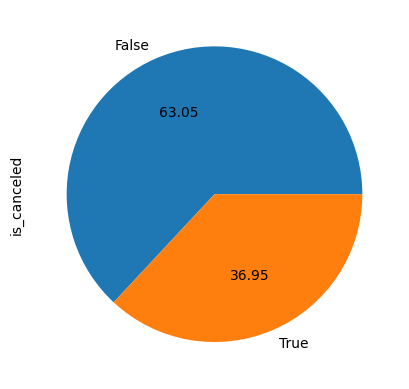

In [17]:
#let's show this with pie chart first approach
hotelBook['is_canceled'].value_counts().plot.pie(autopct='%.2f')

###Split data into train and test data

---

In [18]:
# Separate the independent attributes i.e. every column except cancelled variable
# Store the target column (is_canceled) into Y array
X = hotelBook.loc[:, hotelBook.columns != 'is_canceled']  # independent variables
y = hotelBook.loc[:, hotelBook.columns == 'is_canceled']  # Target variable

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)


(83446, 35) (35763, 35)


###Imputing Missing Values

---

In [19]:
imputer = KNNImputer(n_neighbors=5)
reqd_col_for_impute = ['agent']

In [20]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [21]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

hotel                             0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
CPI_AVG                           0
INFLATION                         0
INFLATION_CHG                     0
CSMR_SENT                   

In [22]:
X_train.nunique()
# hotel, is_canceled, children, babies, meal, market_segment, distribution channel, is_repeated_guest, reserved_room_type, assigned_room_type, deposit_type, customer_type, required_car_parking_spaces, total_of_special_requests, reservation_status, INFLATION_CHG, INTRSRT, US_GINI are categorical.(Taking <6 values)
# lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, previous_cancellations, previous_bookings_not_canceled, booking changes, agent, days_in_waiting_list, adr, reservation_status_date, CPI_AVG, INFLATION, CSMR_SENT, UNRATE, GDP, FUEL_PRCS, CPI_HOTELS, DIS_INC are numeric.(int or float)

hotel                                2
lead_time                          472
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              10
children                             5
babies                               4
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              14
previous_bookings_not_canceled      62
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     20
deposit_type                         3
agent                              317
days_in_waiting_list               123
customer_type                        4
adr                               7486
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status                   3
CPI_AVG                             33
INFLATION                

In [23]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

City Hotel      55509
Resort Hotel    27937
Name: hotel, dtype: int64
******************************
0     82810
1       626
2         9
10        1
9         0
Name: babies, dtype: int64
******************************
BB           64394
HB           10141
SC            7524
Undefined      827
FB             560
Name: meal, dtype: int64
******************************
Online TA        39675
Offline TA/TO    17056
Groups           13610
Direct            8775
Corporate         3664
Complementary      497
Aviation           168
Undefined            1
Name: market_segment, dtype: int64
******************************
TA/TO        68515
Direct       10163
Corporate     4618
GDS            147
Undefined        3
Name: distribution_channel, dtype: int64
******************************
A    60010
D    13446
E     4620
F     2031
G     1458
B      782
C      655
H      427
P       12
L        5
Name: reserved_room_type, dtype: int64
******************************
A    51683
D    17701
E     5510


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83446 entries, 11092 to 14853
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           83446 non-null  category
 1   lead_time                       83446 non-null  int64   
 2   stays_in_weekend_nights         83446 non-null  int64   
 3   stays_in_week_nights            83446 non-null  int64   
 4   adults                          83446 non-null  int64   
 5   children                        83446 non-null  int64   
 6   babies                          83446 non-null  category
 7   meal                            83446 non-null  category
 8   market_segment                  83446 non-null  category
 9   distribution_channel            83446 non-null  category
 10  is_repeated_guest               83446 non-null  bool    
 11  previous_cancellations          83446 non-null  int64   
 12  previous_booki

In [25]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,83446.0,103.569782,106.391194,0.000000,18.000000,69.000000,160.000000,737.000000
stays_in_weekend_nights,83446.0,0.932052,1.005091,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,83446.0,2.506052,1.928218,0.000000,1.000000,2.000000,3.000000,50.000000
adults,83446.0,1.856973,0.550238,0.000000,2.000000,2.000000,2.000000,50.000000
children,83446.0,0.105290,0.400924,0.000000,0.000000,0.000000,0.000000,10.000000
previous_cancellations,83446.0,0.084294,0.822471,0.000000,0.000000,0.000000,0.000000,26.000000
previous_bookings_not_canceled,83446.0,0.134662,1.503776,0.000000,0.000000,0.000000,0.000000,72.000000
booking_changes,83446.0,0.220981,0.655047,0.000000,0.000000,0.000000,0.000000,21.000000
agent,83446.0,86.710068,102.820561,1.000000,9.000000,28.000000,153.000000,535.000000
days_in_waiting_list,83446.0,2.294226,17.376776,0.000000,0.000000,0.000000,0.000000,391.000000


In [26]:
X_train.describe(include=['category','bool']).T

,count,unique,top,freq
hotel,83446,2,City Hotel,55509
babies,83446,4,0,82810
meal,83446,5,BB,64394
market_segment,83446,8,Online TA,39675
distribution_channel,83446,5,TA/TO,68515
is_repeated_guest,83446,2,False,80942
reserved_room_type,83446,10,A,60010
assigned_room_type,83446,12,A,51683
deposit_type,83446,3,No Deposit,73211
customer_type,83446,4,Transient,62724


In [27]:
y_train.value_counts()

is_canceled
False          52616
True           30830
dtype: int64

In [28]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x = feature, ax=ax_box2, showmeans = True, color = 'violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(x =feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

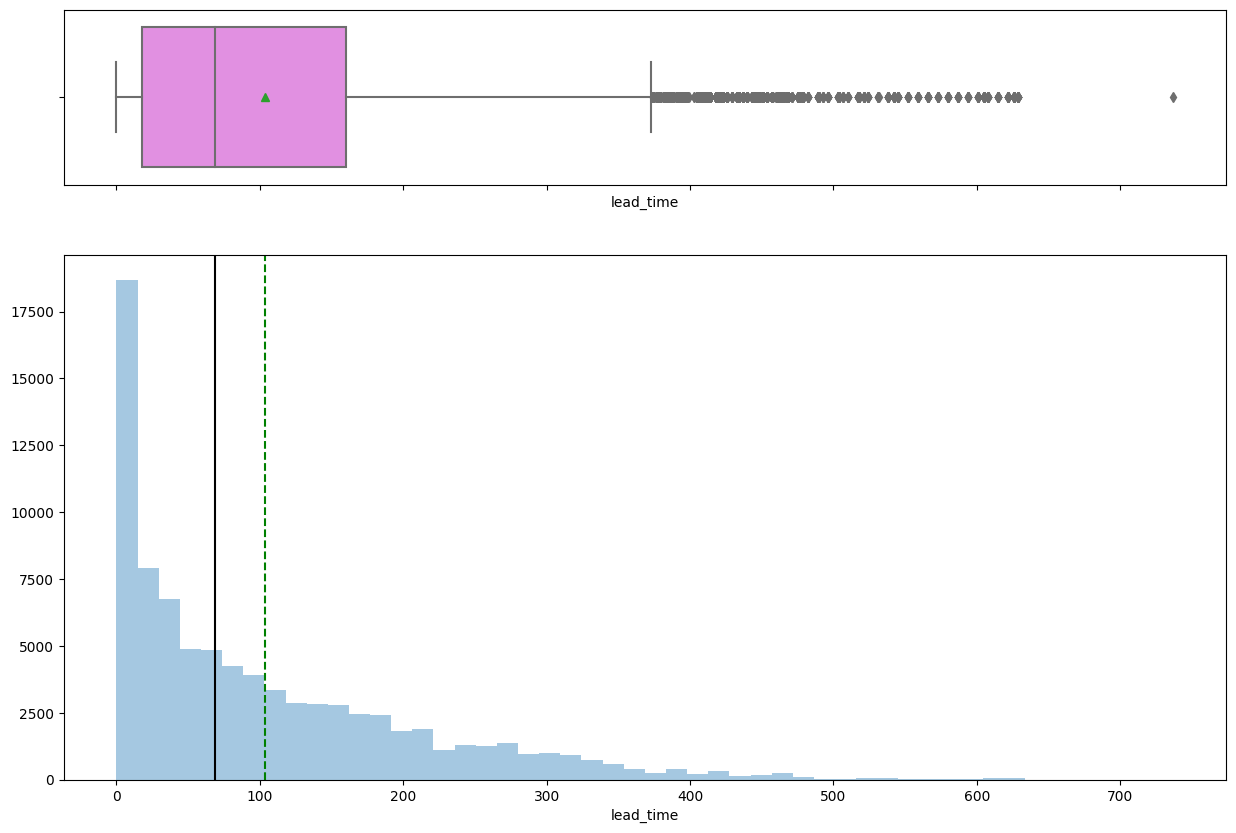

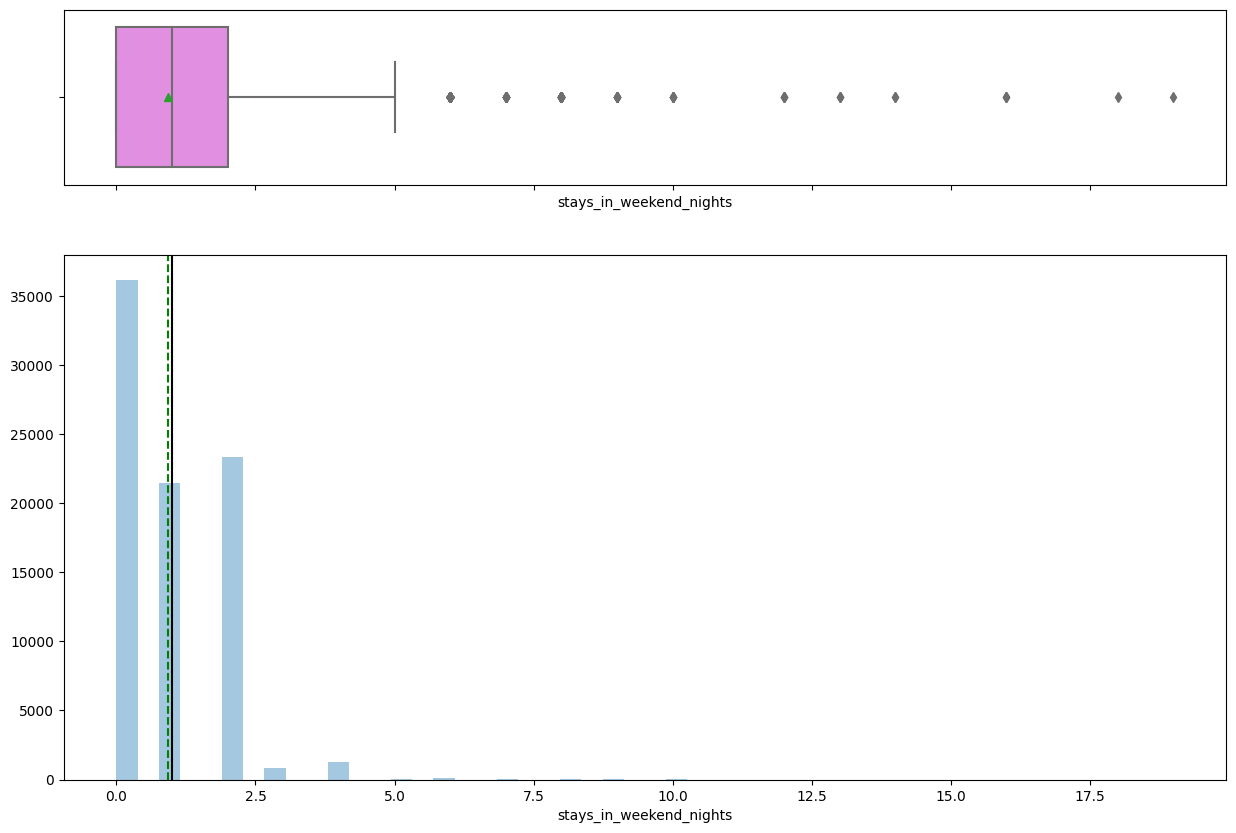

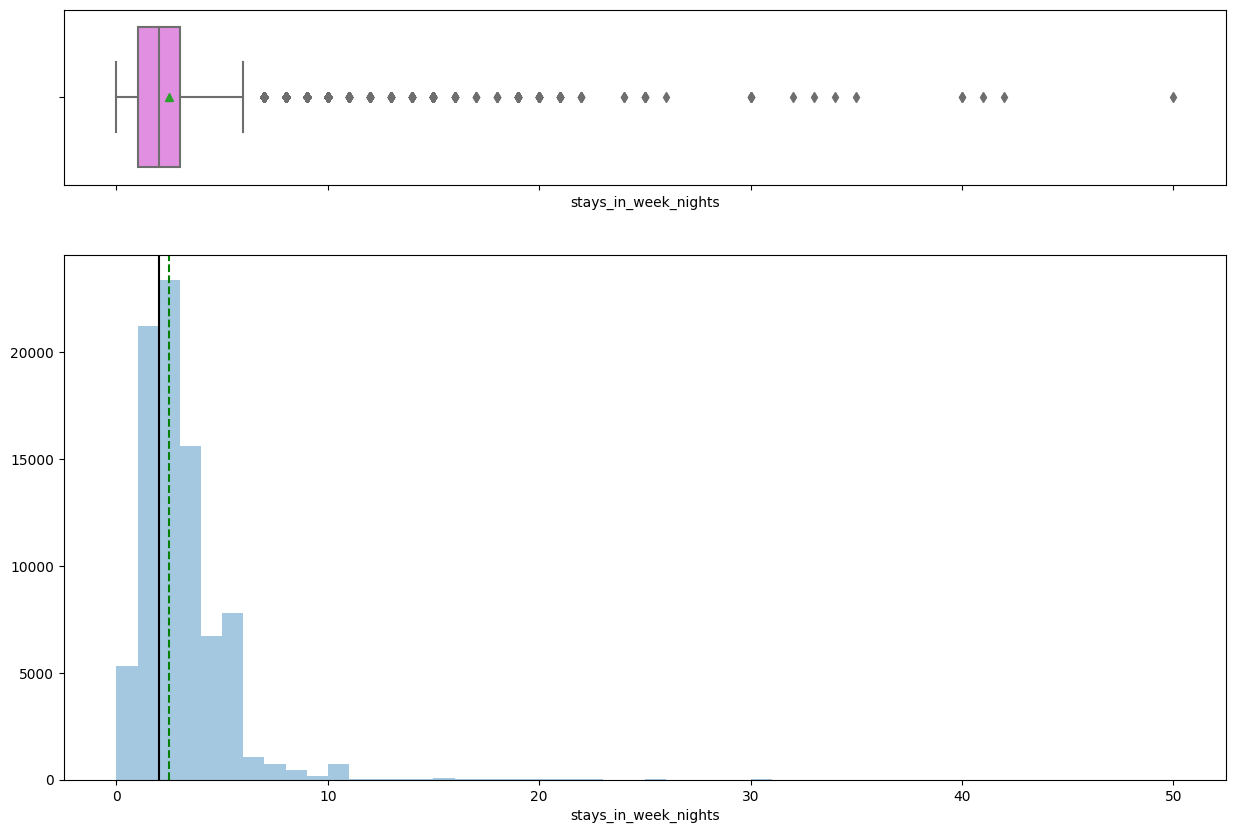

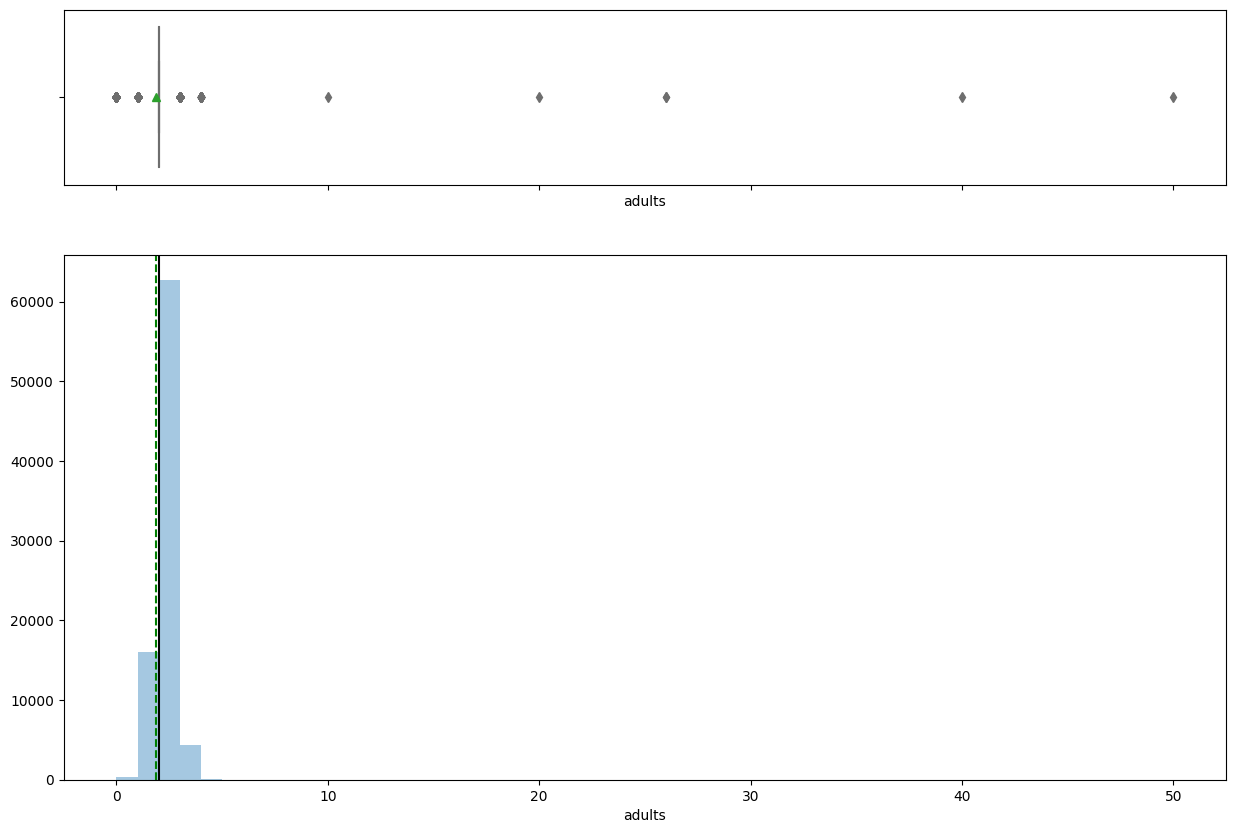

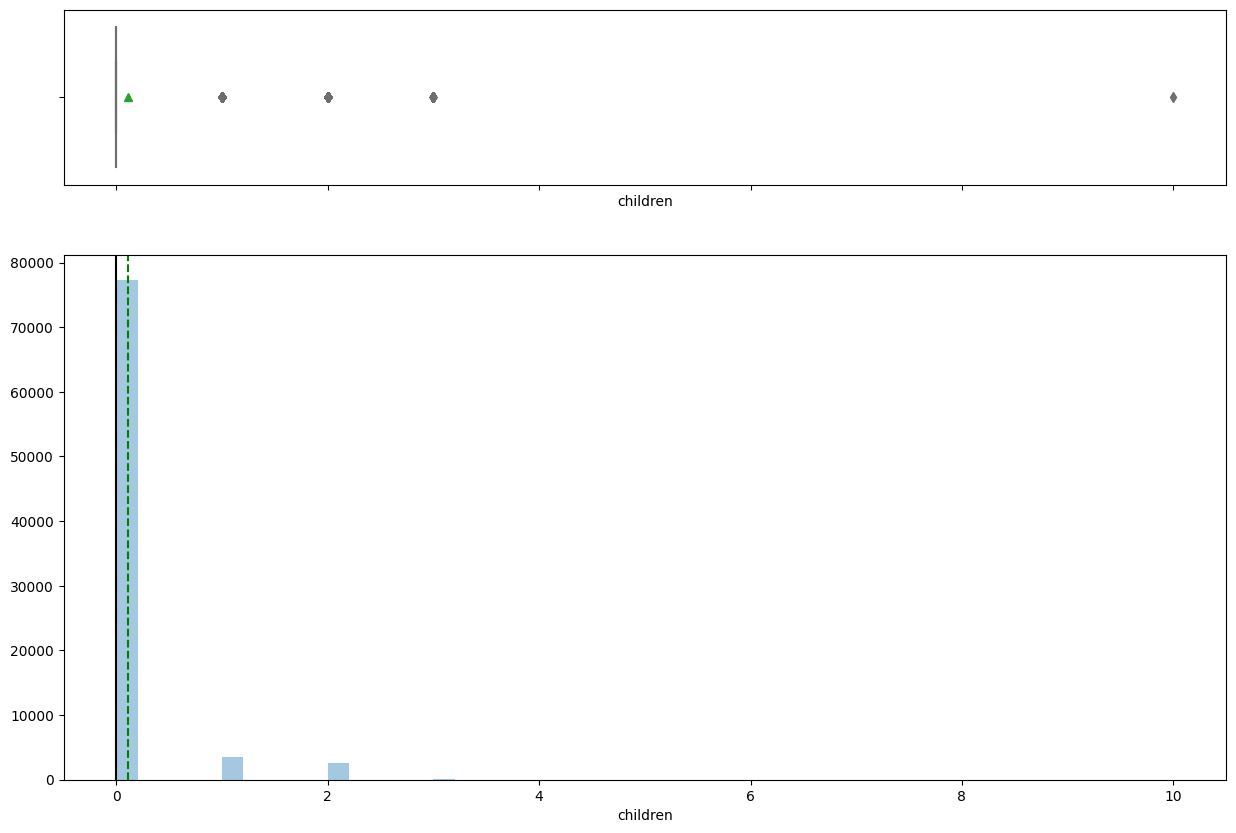

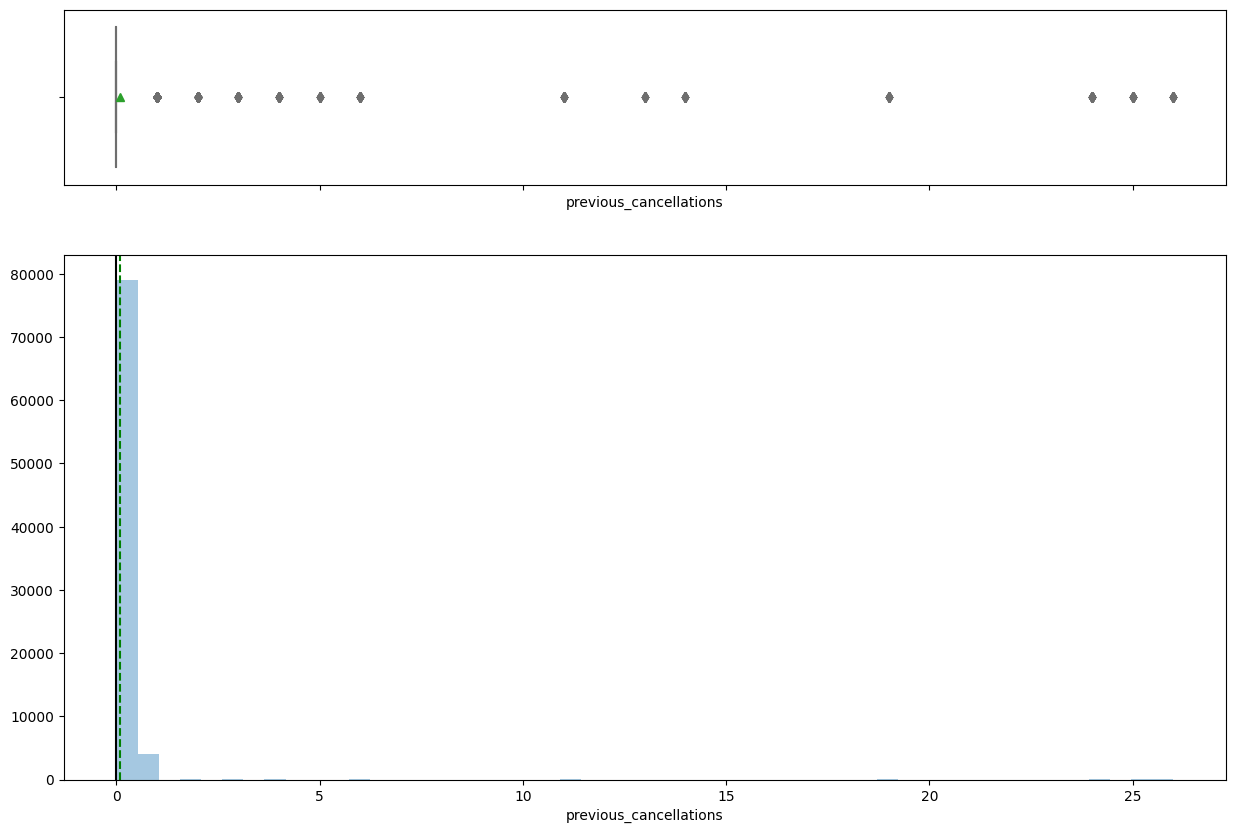

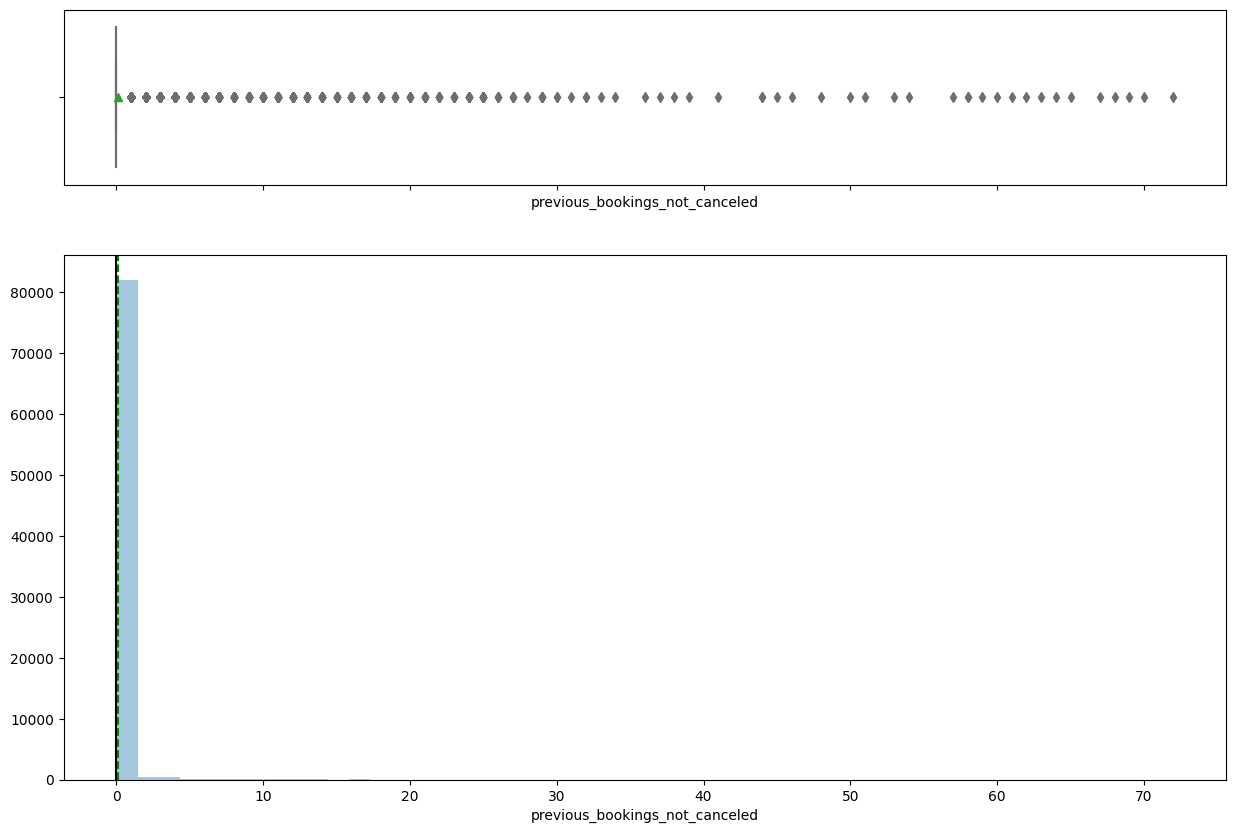

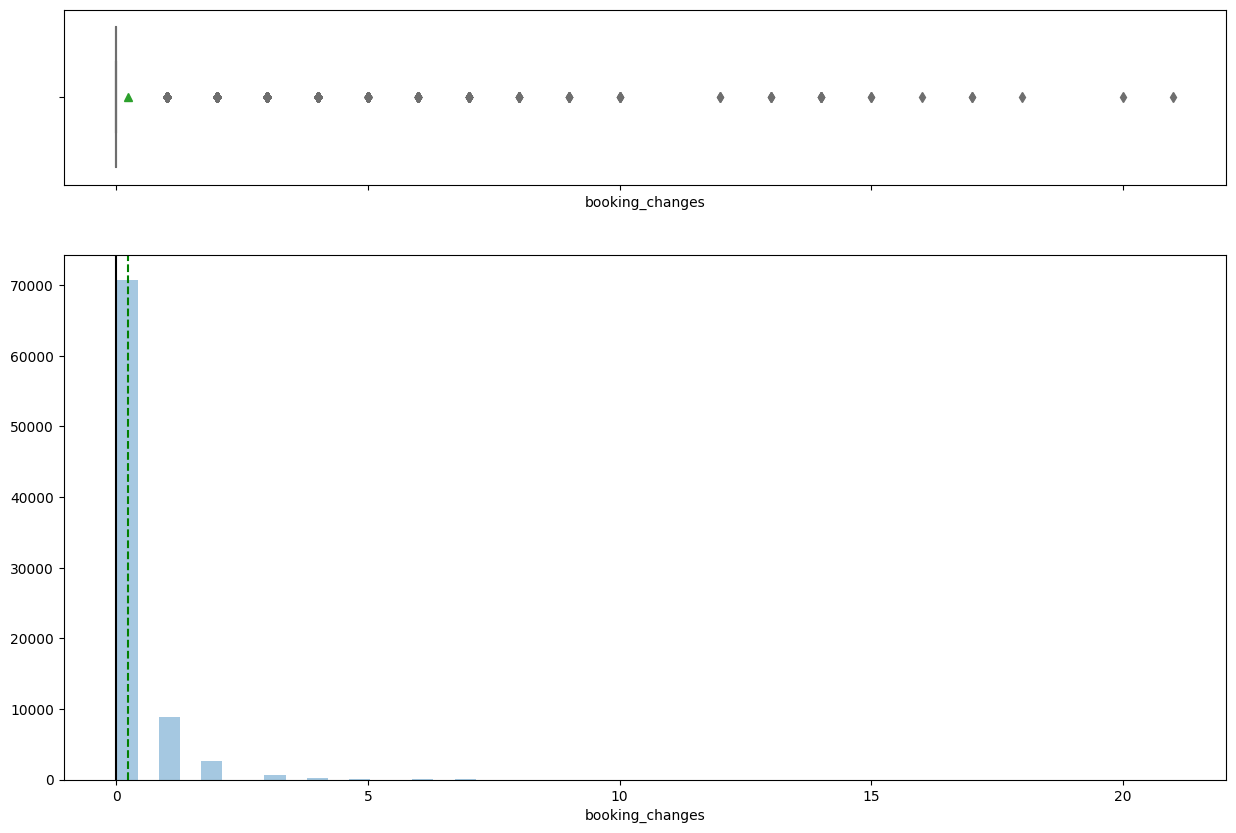

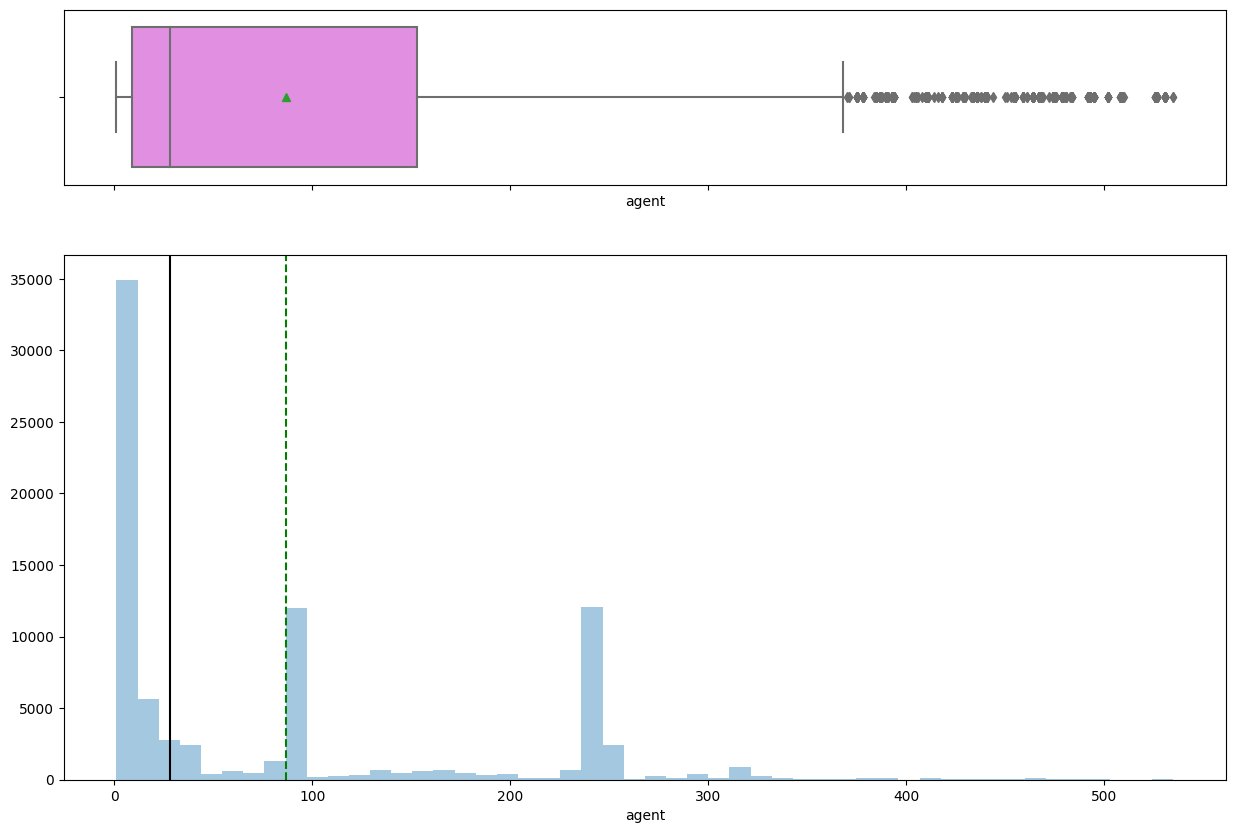

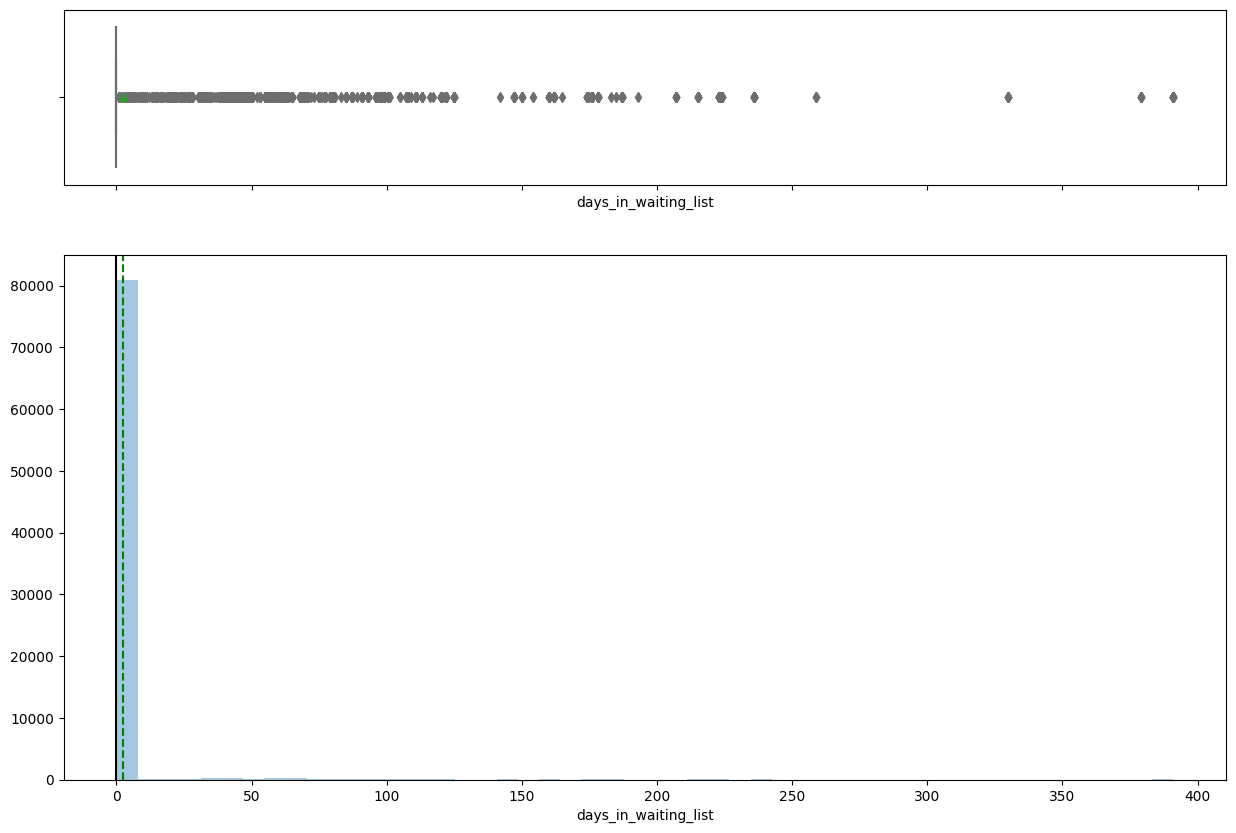

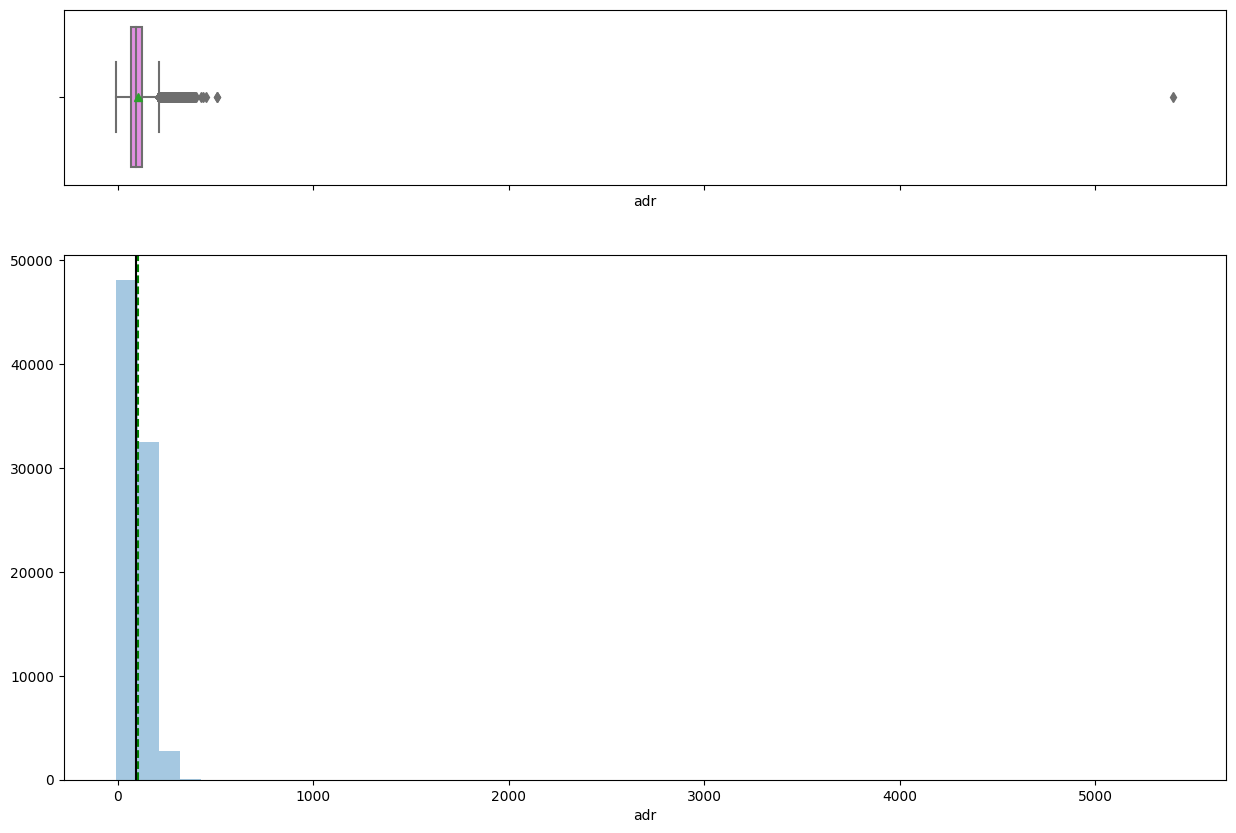

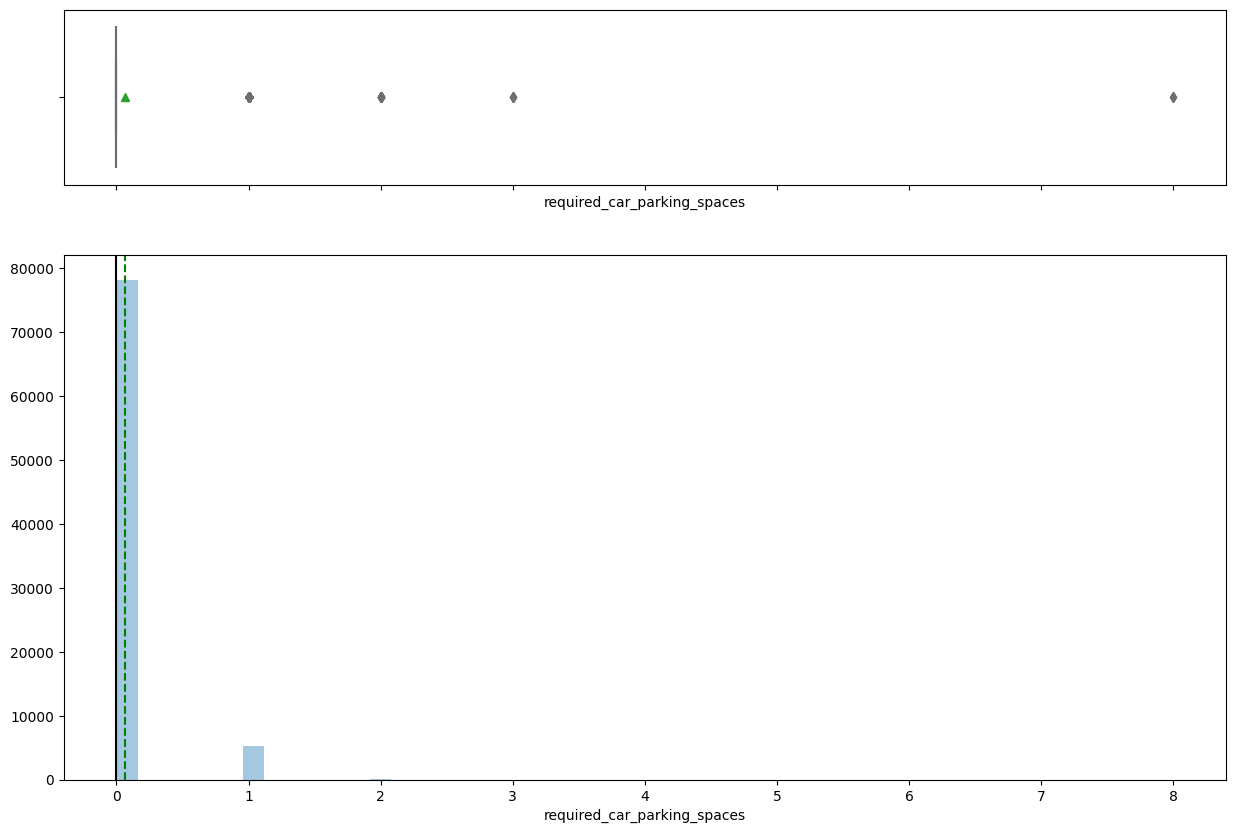

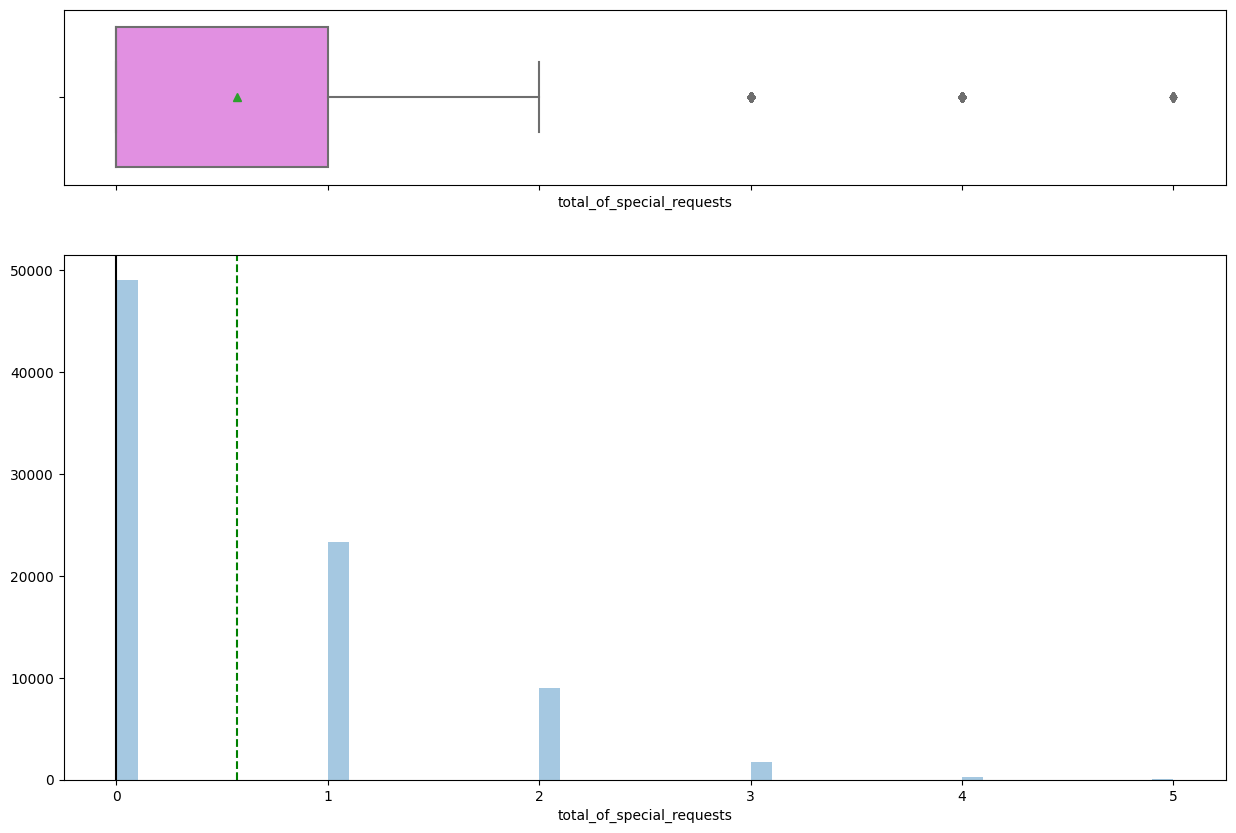

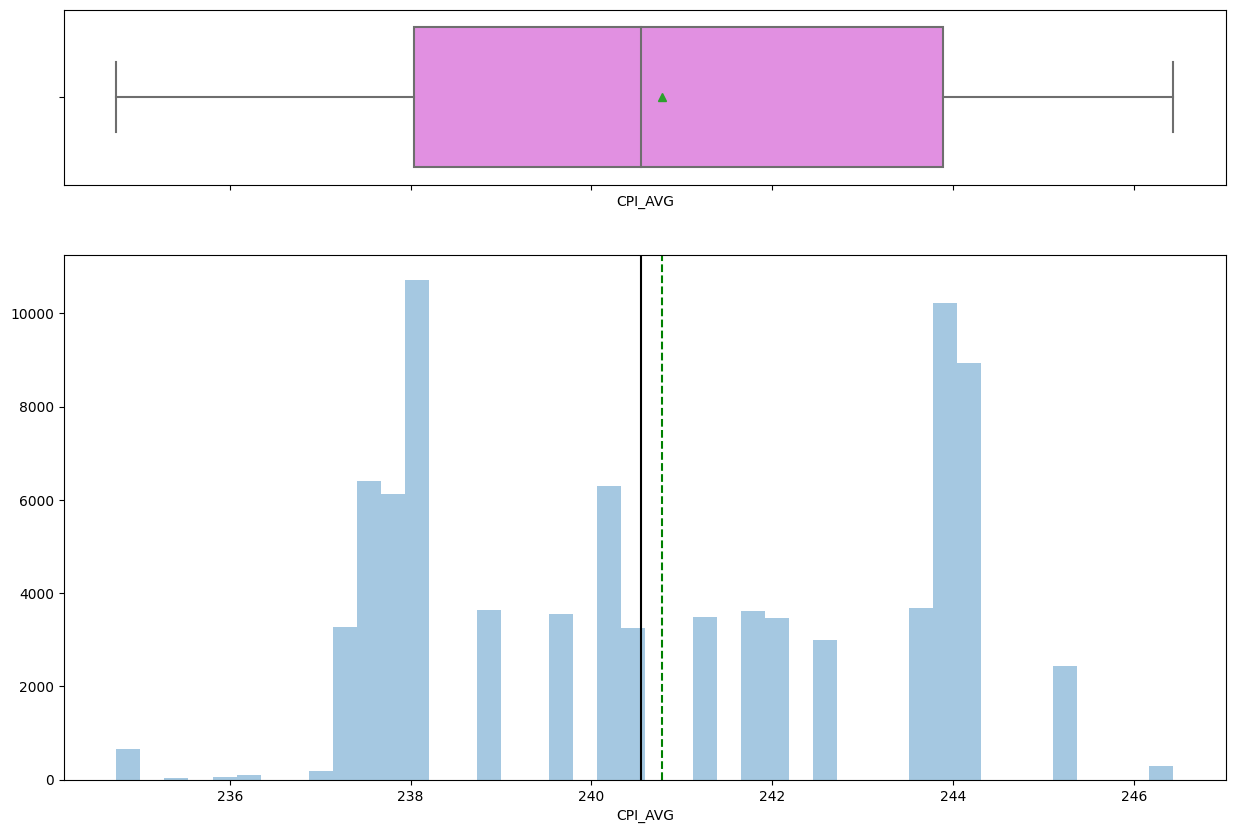

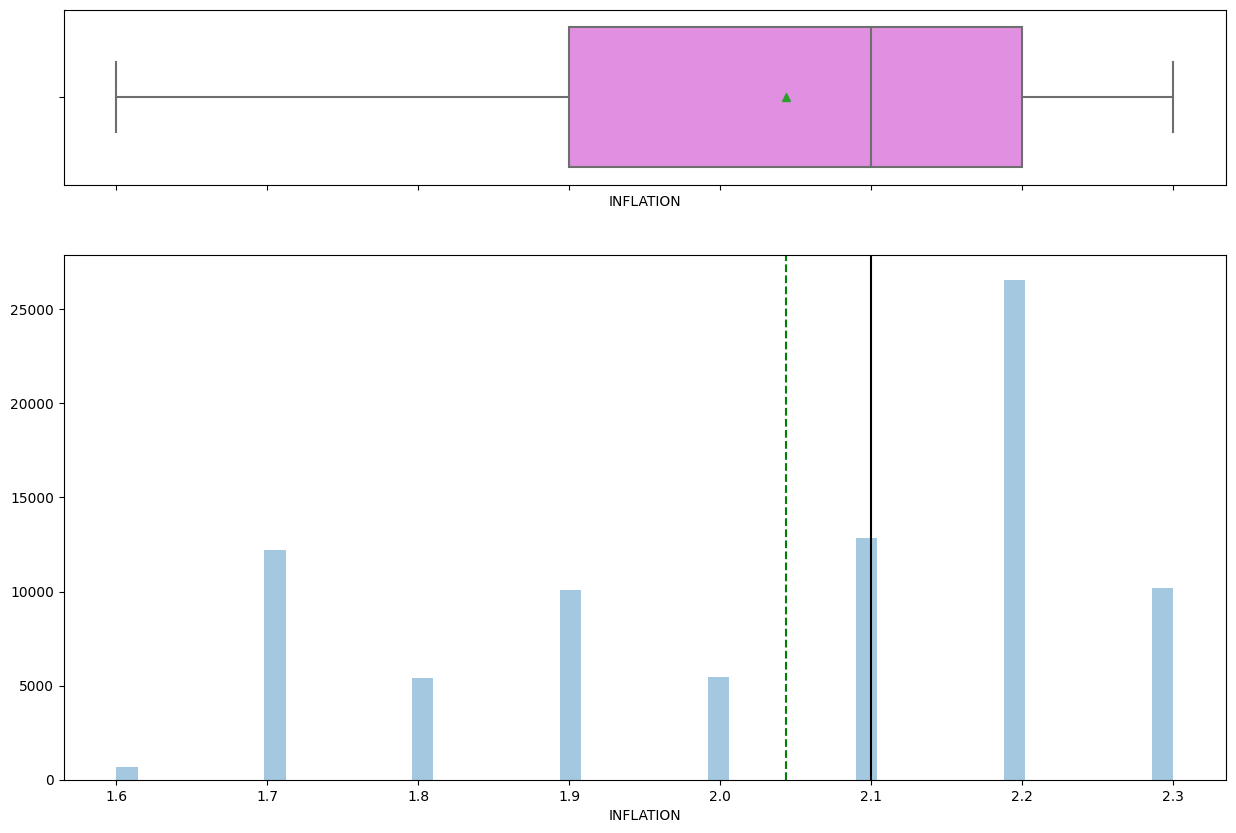

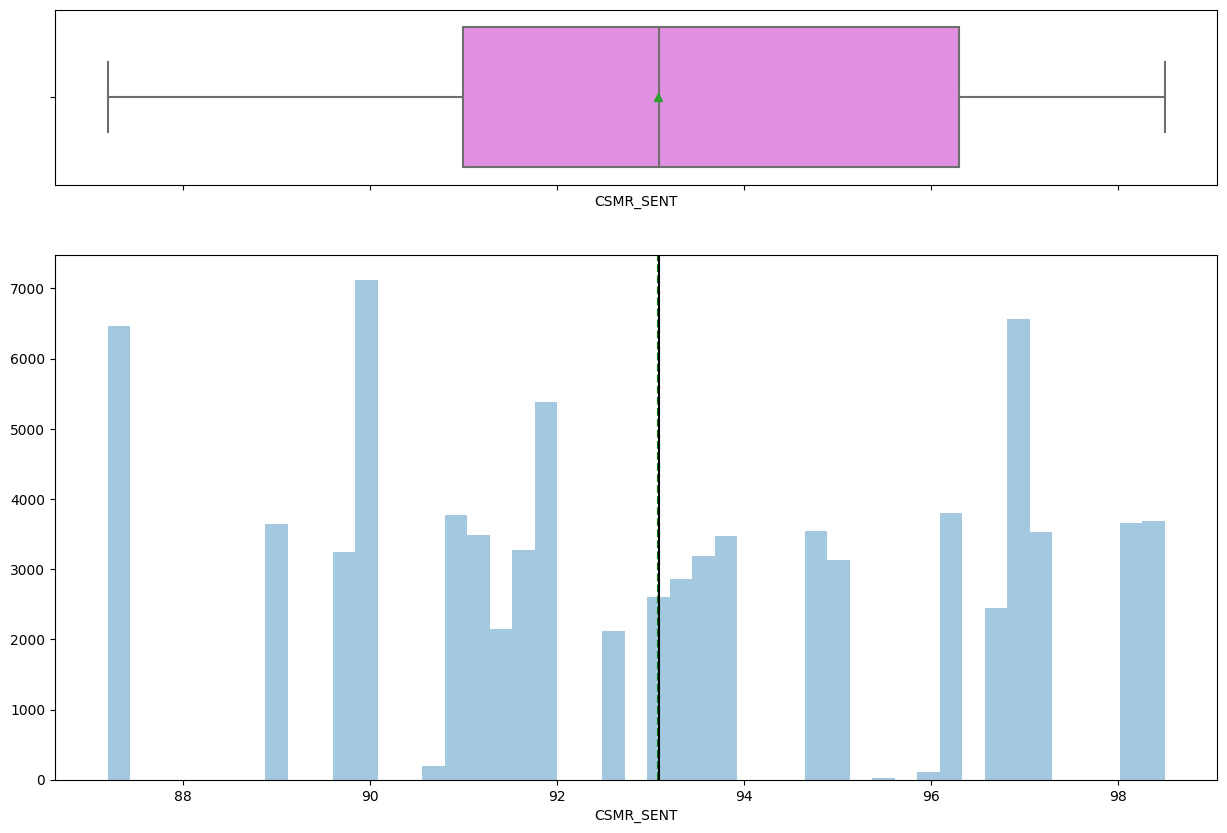

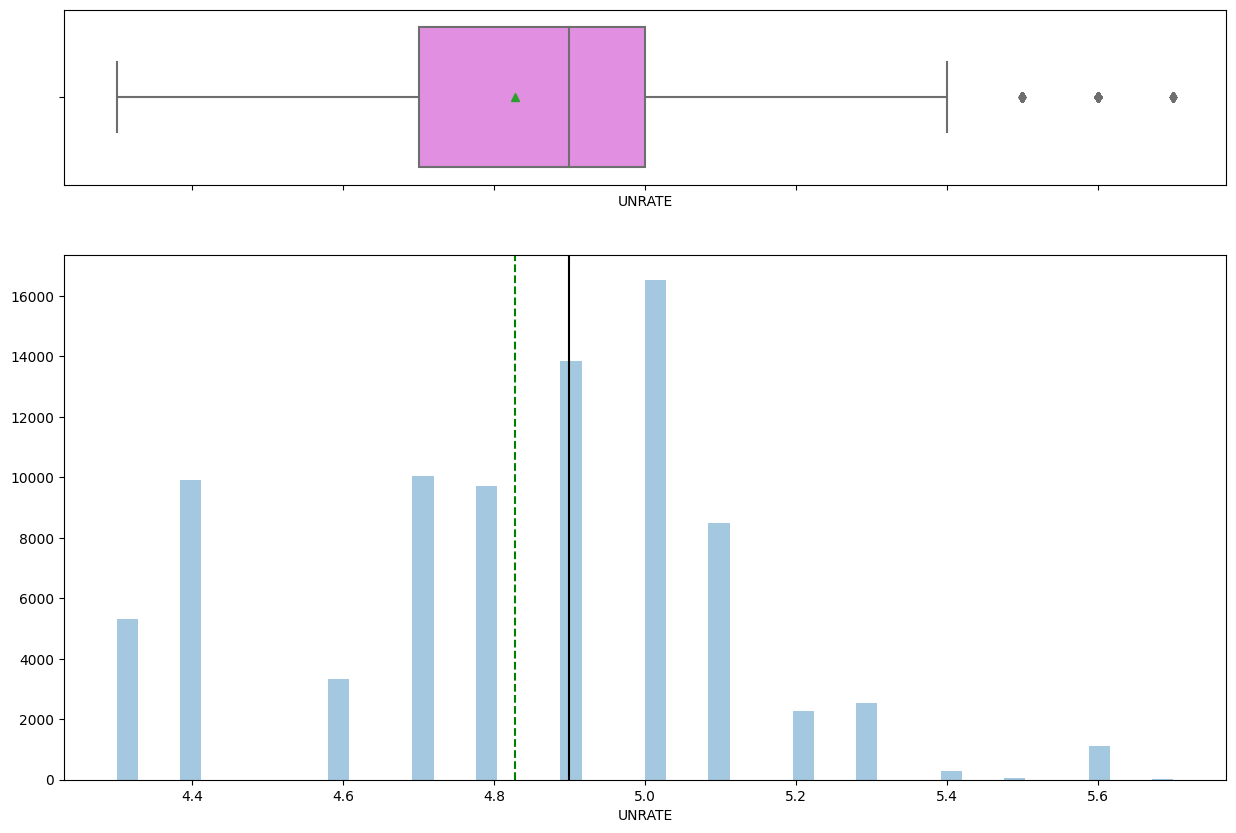

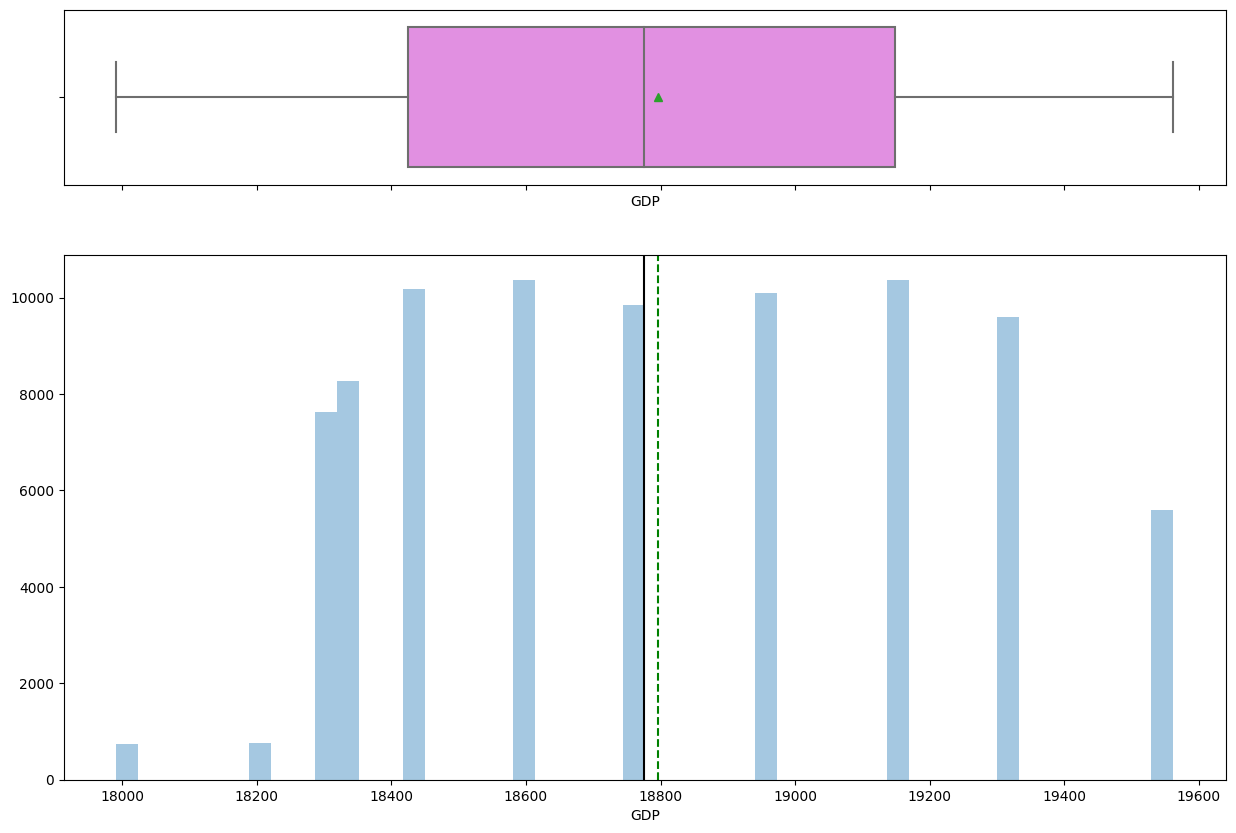

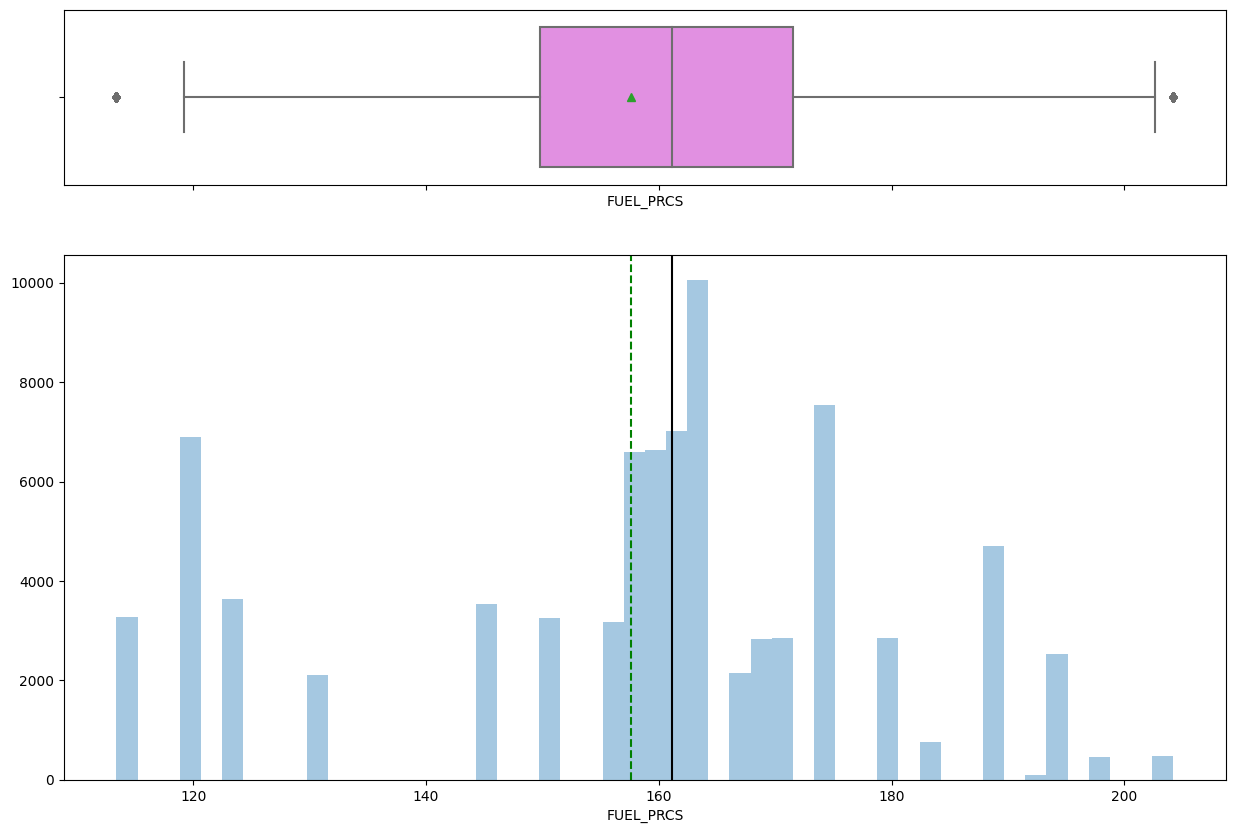

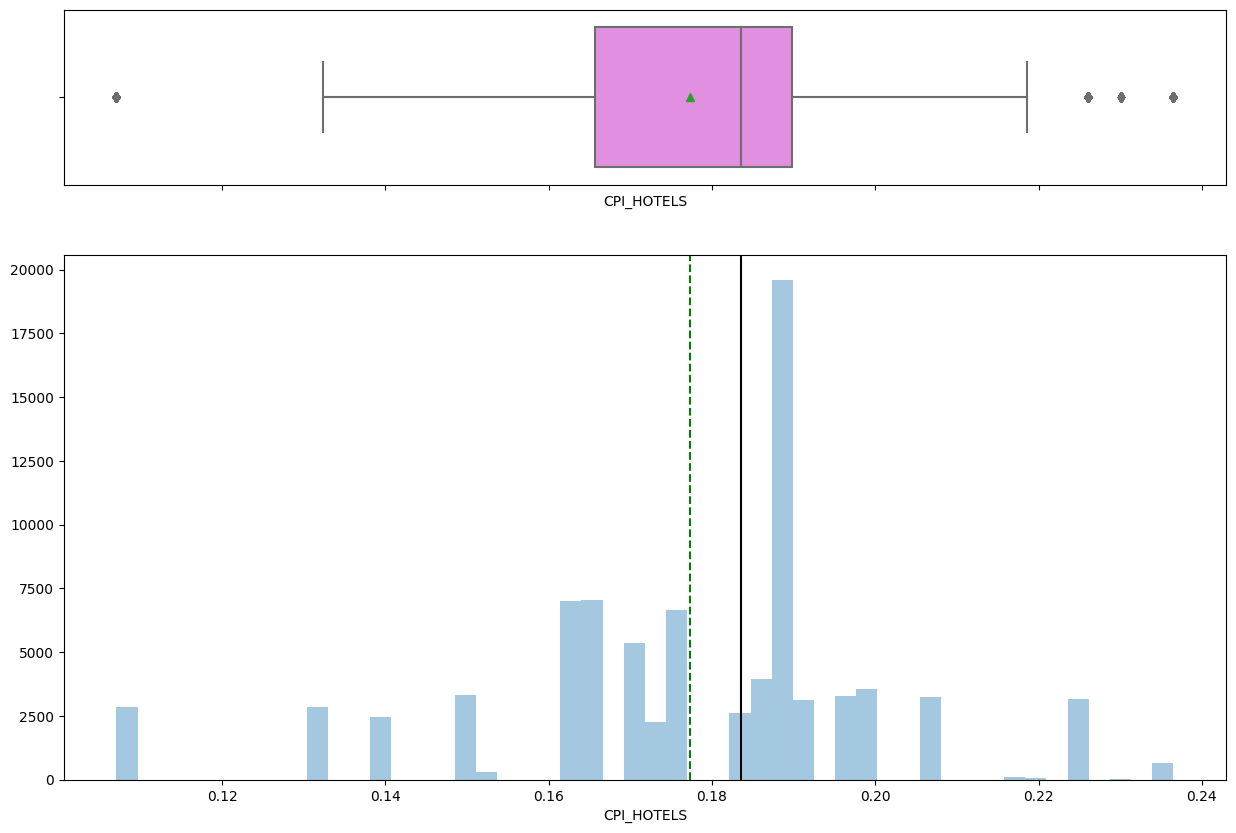

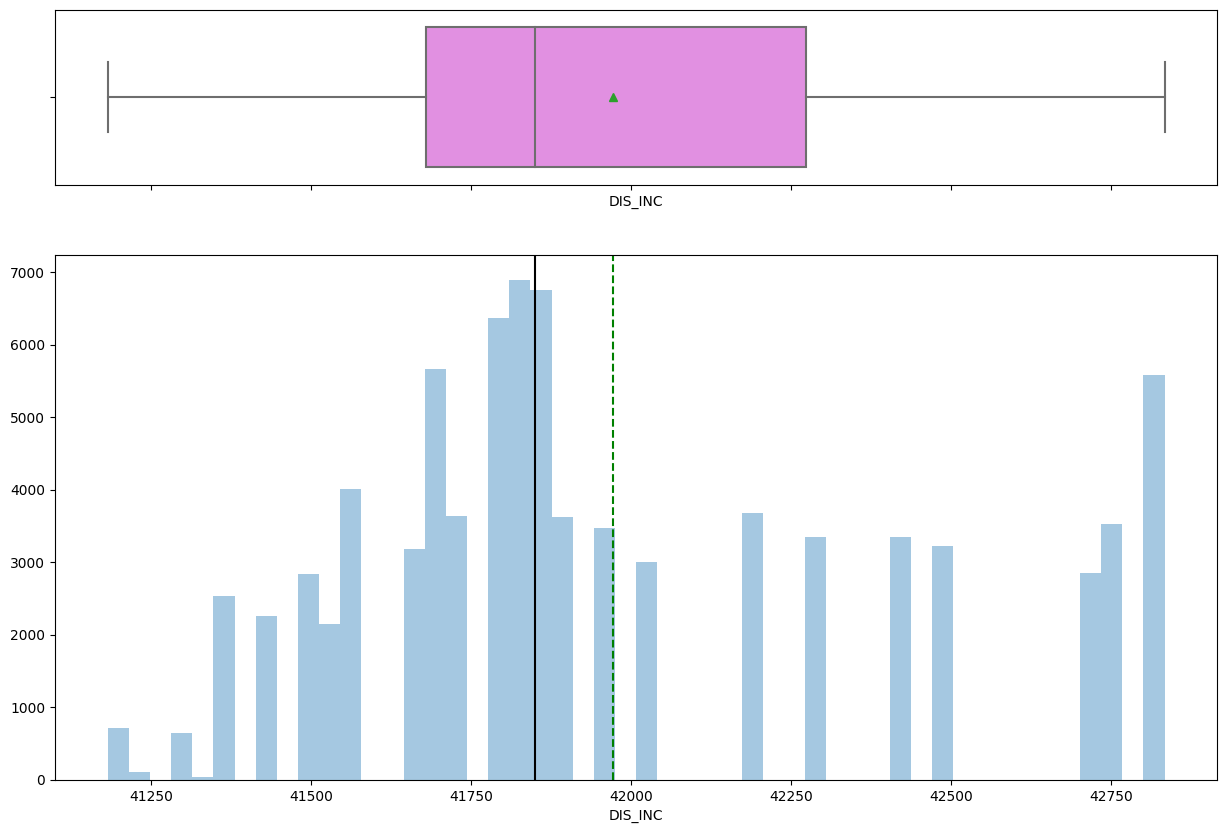

In [29]:
# distplot for continous columns
for i in ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults', 'children', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests','CPI_AVG','INFLATION','CSMR_SENT','UNRATE','GDP','FUEL_PRCS','CPI_HOTELS','DIS_INC']:
    histogram_boxplot(X_train[i])
    plt.show()

In [30]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage
    plt.show() # show the plot

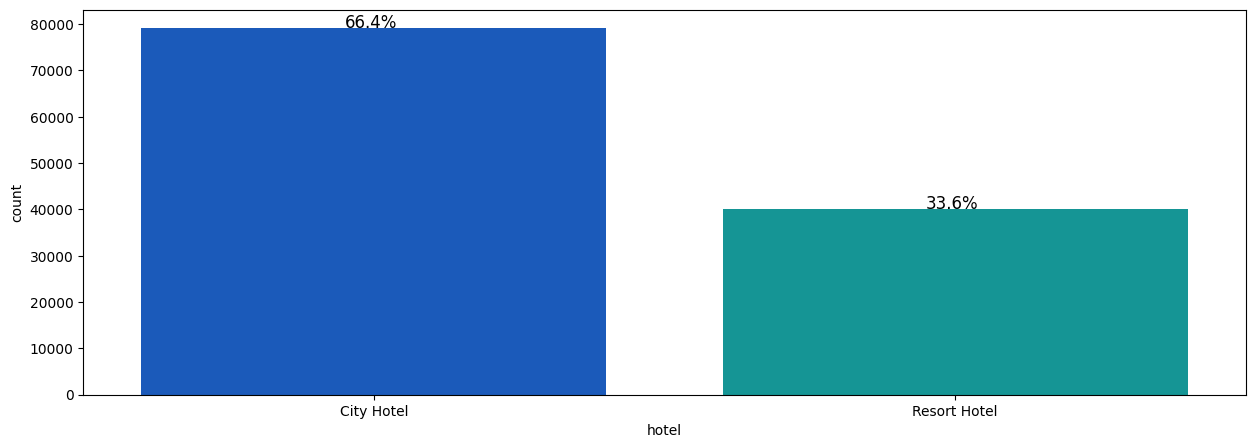

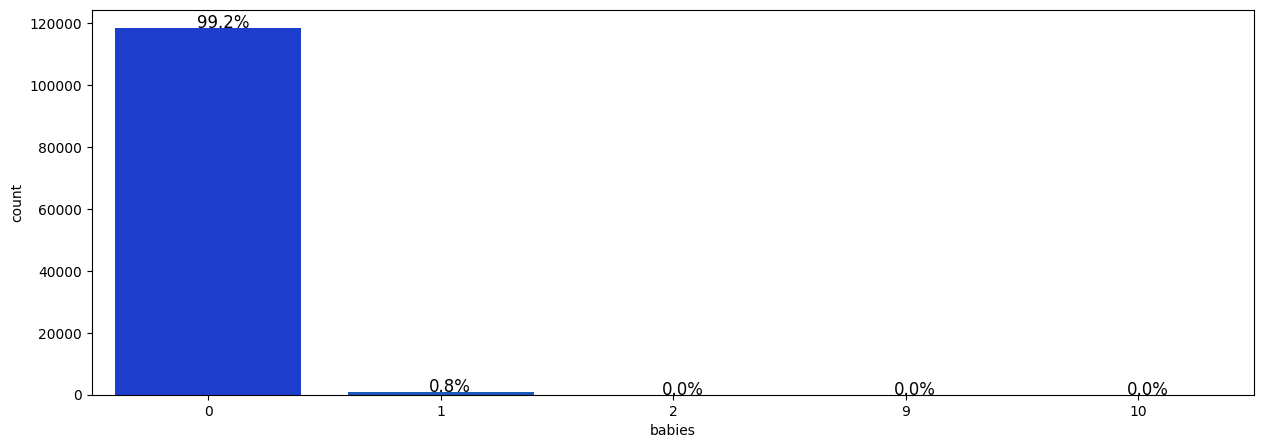

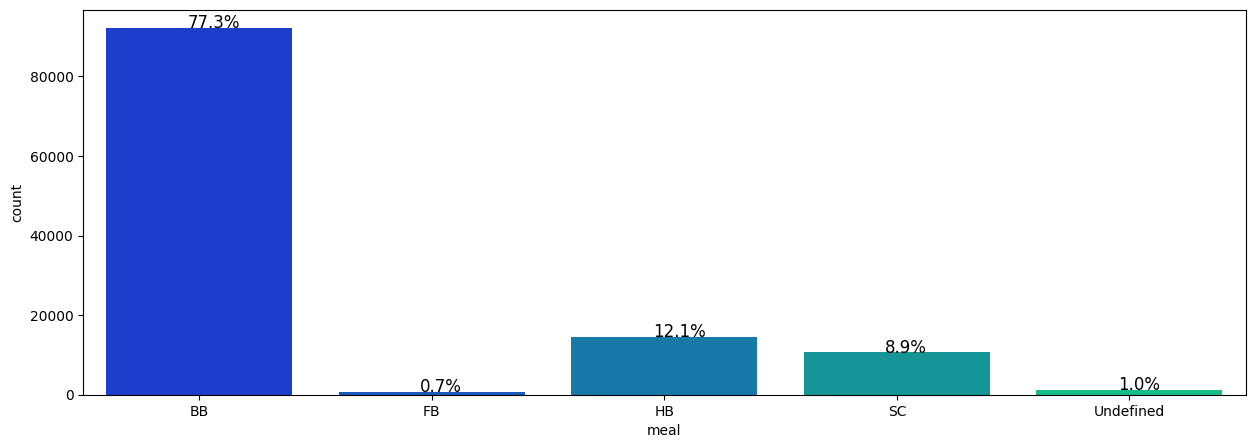

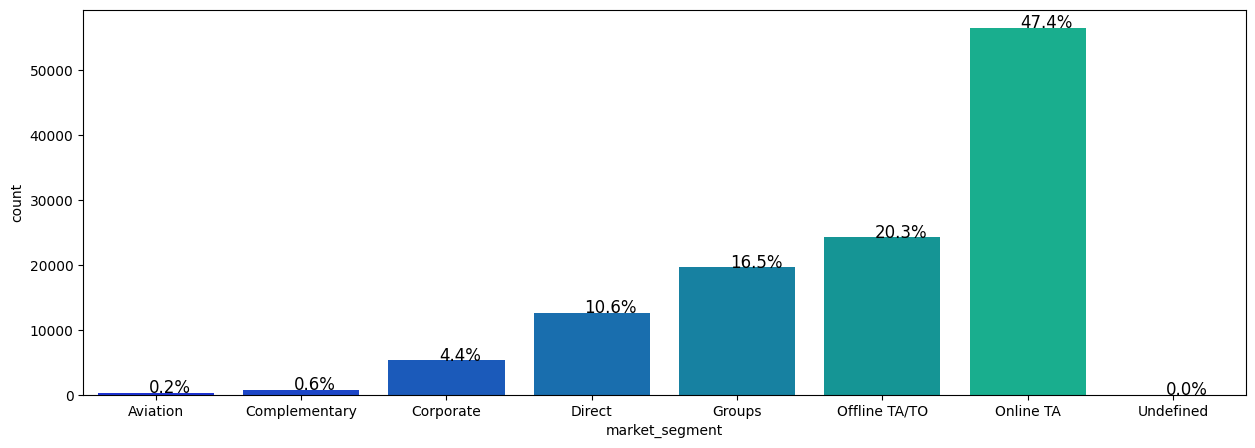

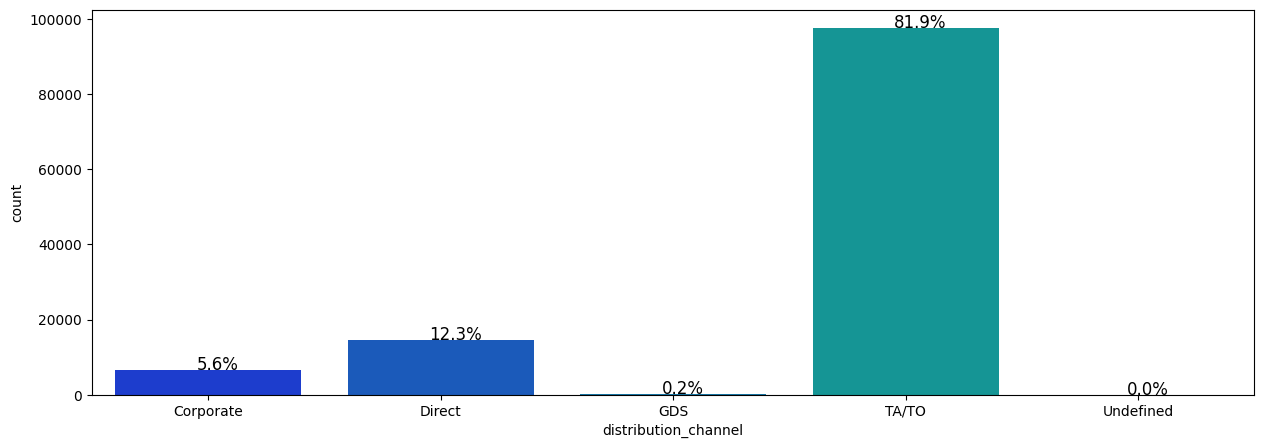

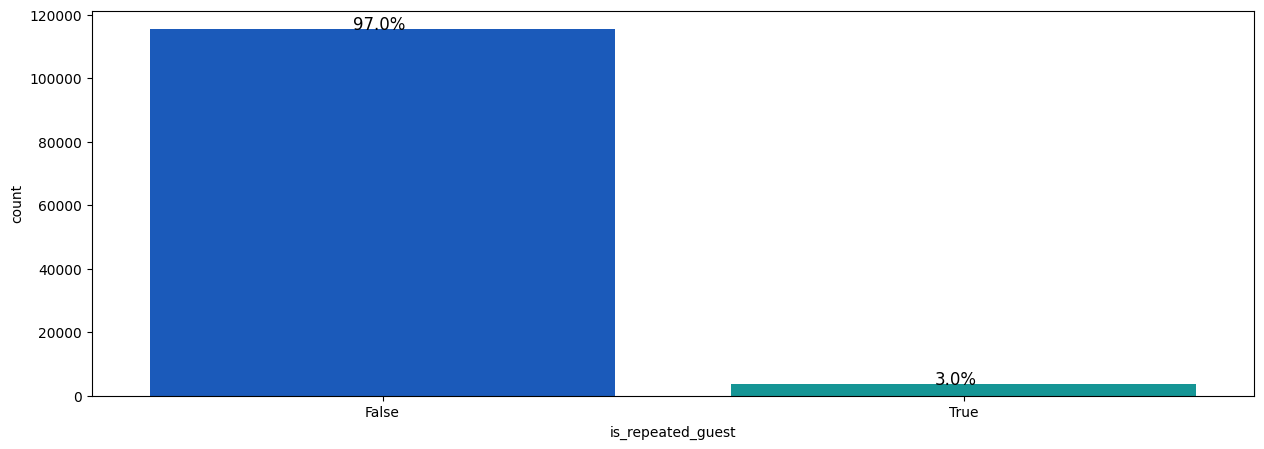

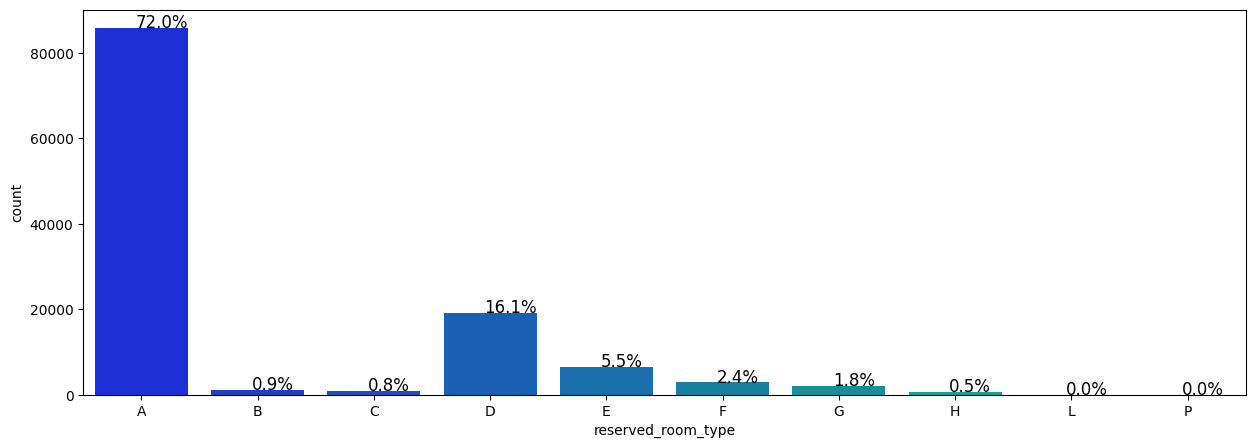

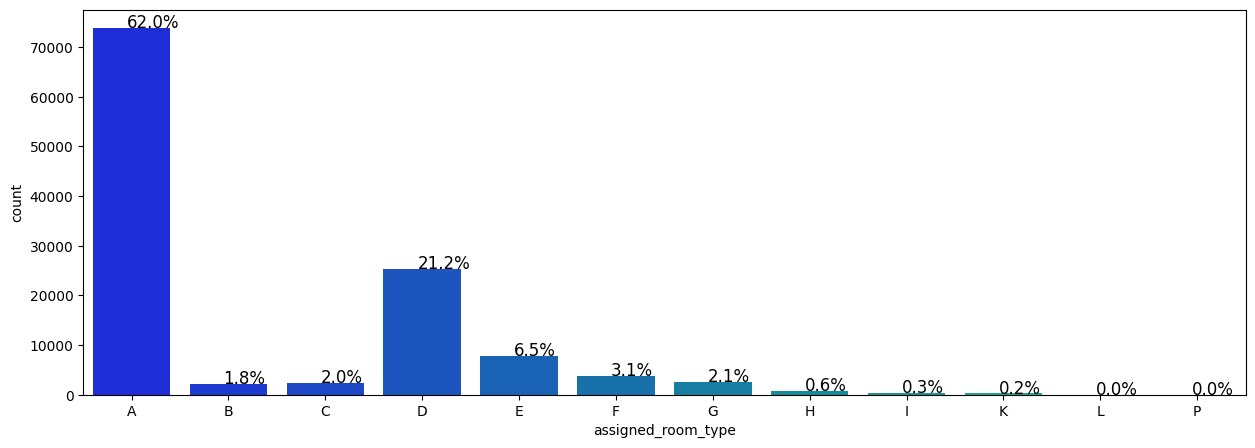

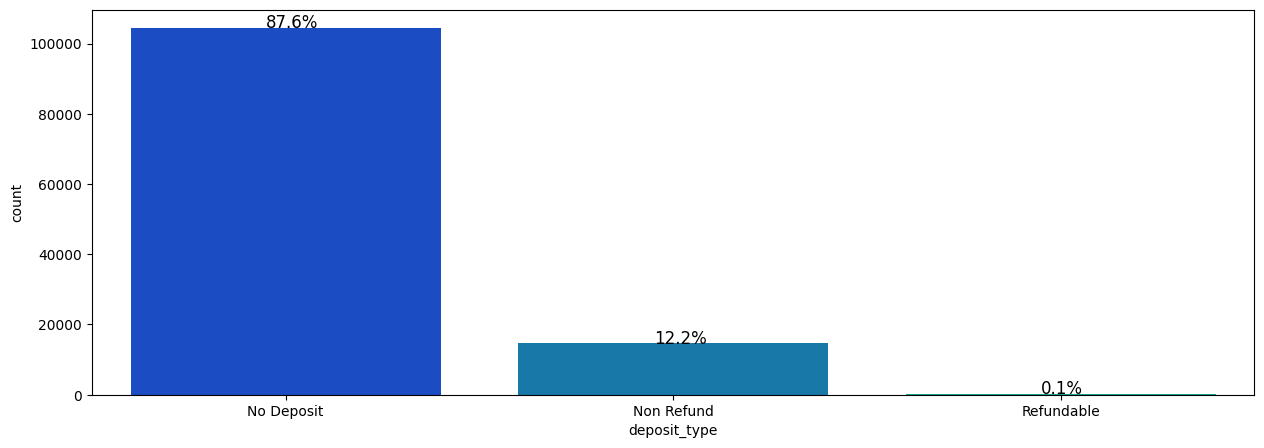

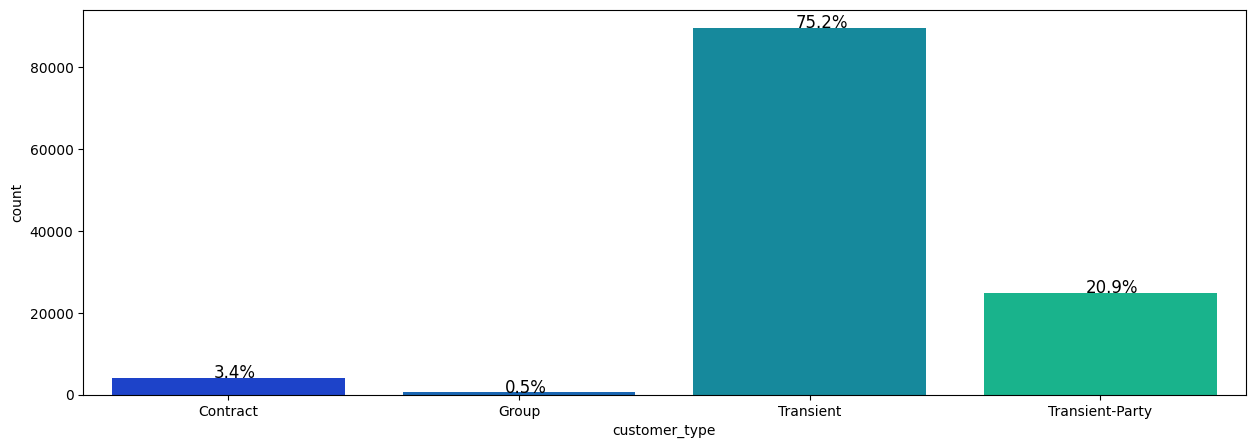

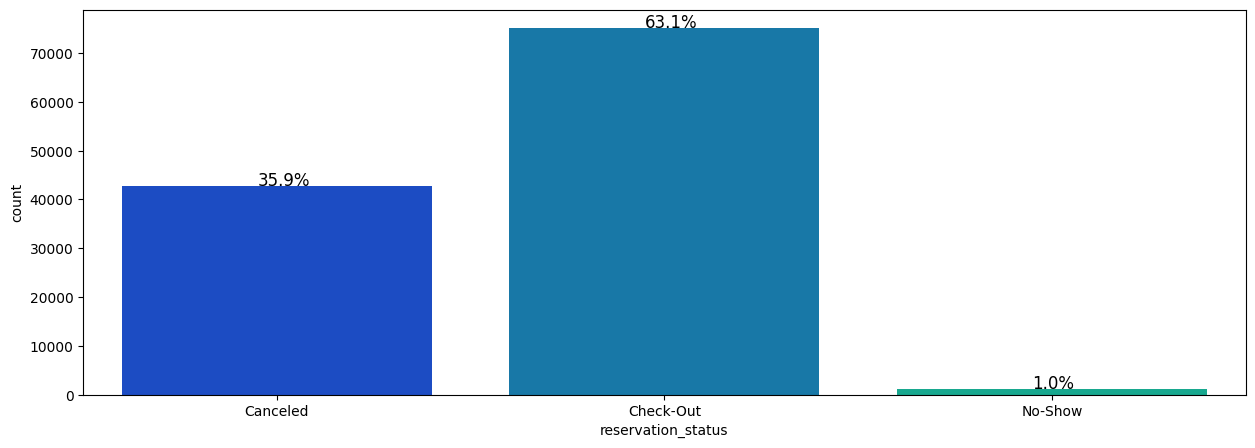

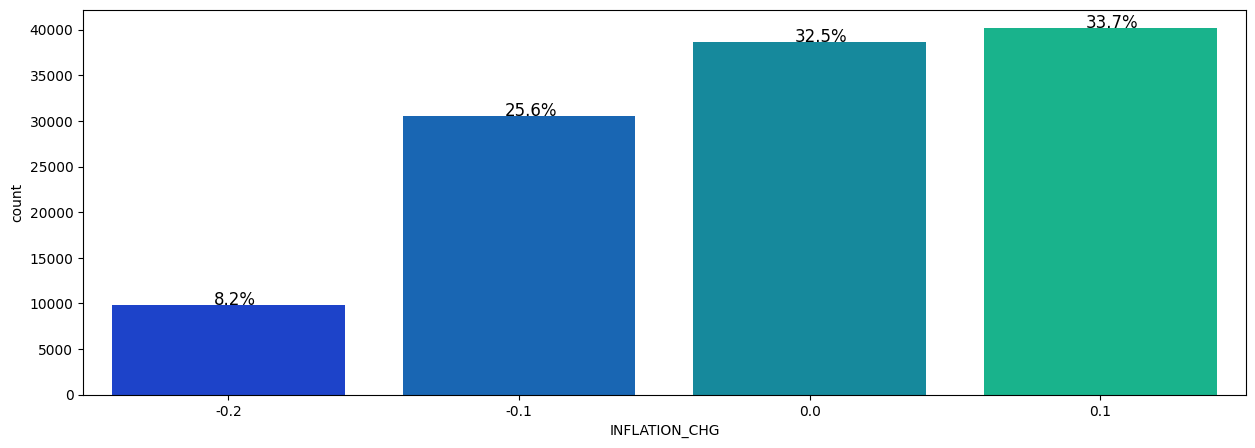

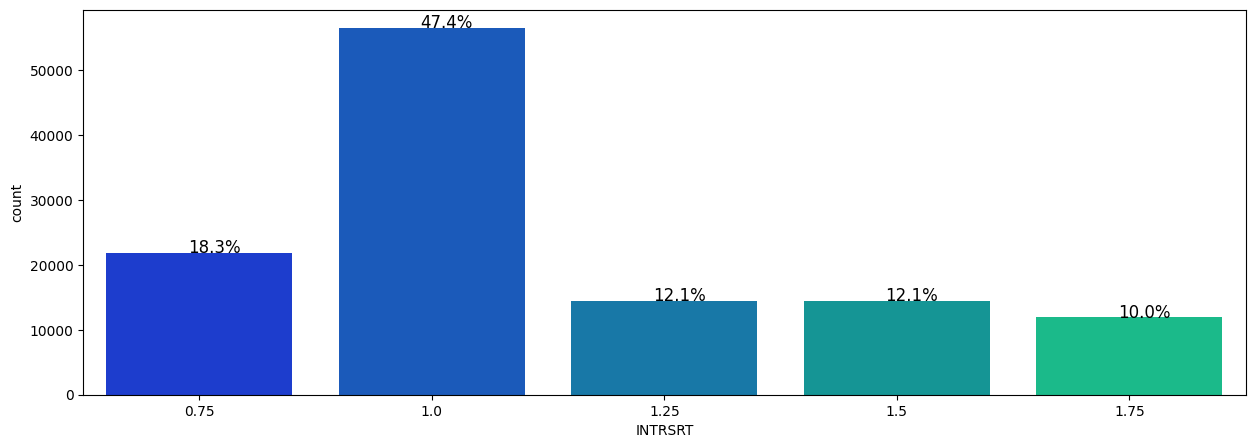

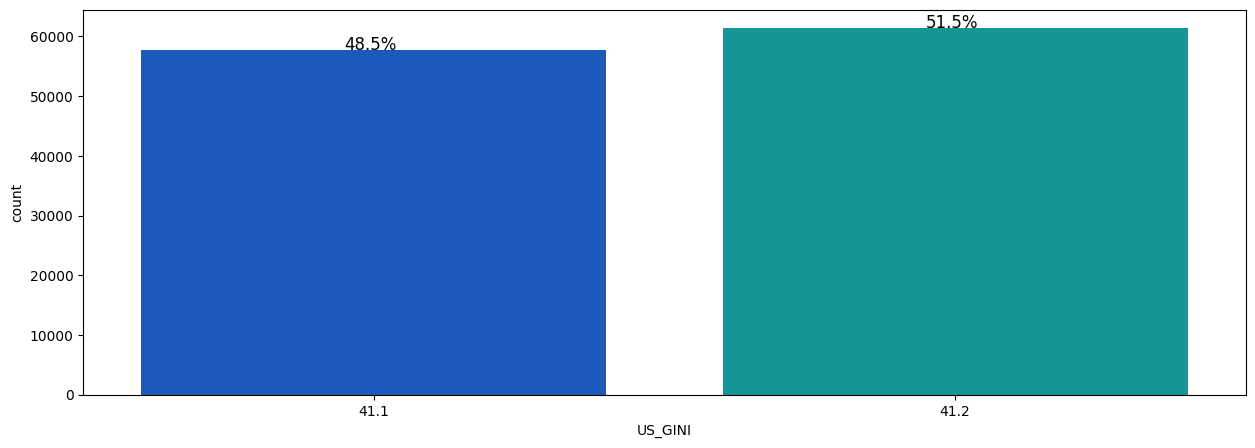

In [31]:
# bar plots for categorical values
for i in ['hotel', 'babies','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type','customer_type', 'reservation_status', 'INFLATION_CHG', 'INTRSRT', 'US_GINI']:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x = hotelBook[i],palette='winter')
    perc_on_bar(ax,hotelBook[i])
    plt.show()

In [32]:
## Let us plot all the columns to look at their distributions
#
#import seaborn as sns
#for i in X_train.columns:
#    sns.set({'figure.figsize': (5,5)})
#    sns.histplot(X_train[i], kde=True)
#    plt.show()

In [33]:
X_train.stays_in_weekend_nights.value_counts()
# Mostly 0, 1, 2.

0     36184
2     23376
1     21454
4      1306
3       874
6       109
5        56
8        43
7        15
9         9
10        6
12        4
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

In [34]:
X_train.adults.value_counts()
# Mostly 1, 2, 3. Can consider all others as outliers.

2     62741
1     15993
3      4378
0       284
4        44
26        2
40        1
50        1
10        1
20        1
Name: adults, dtype: int64

In [35]:
X_train.children.value_counts()
# Mostly 0, 1, 2. 92% values are 0. Convert float to integer. Consider all others as outliers.
# Drop the column.

0     77341
1      3491
2      2554
3        59
10        1
Name: children, dtype: int64

In [36]:
X_train.babies.value_counts()
# Mostly 0. Column can be dropped.

0     82810
1       626
2         9
10        1
9         0
Name: babies, dtype: int64

In [37]:
X_train.meal.value_counts()
# FB less than 1% valuecount. More than 77% BB.

BB           64394
HB           10141
SC            7524
Undefined      827
FB             560
Name: meal, dtype: int64

In [38]:
X_train.market_segment.value_counts()
# Complementary, Aviation and Undefined are outliers.

Online TA        39675
Offline TA/TO    17056
Groups           13610
Direct            8775
Corporate         3664
Complementary      497
Aviation           168
Undefined            1
Name: market_segment, dtype: int64

In [39]:
X_train.distribution_channel.value_counts()
# 88% is TA/TO. GDS, Undefined is less than 1%.

TA/TO        68515
Direct       10163
Corporate     4618
GDS            147
Undefined        3
Name: distribution_channel, dtype: int64

In [40]:
X_train.is_repeated_guest.value_counts()
# Drop this imbalanced column.

False    80942
True      2504
Name: is_repeated_guest, dtype: int64

In [41]:
X_train.previous_cancellations.value_counts()
# 94.5% data is 0, highly imbalanced.
#Column can be dropped.

0     79059
1      4080
2        85
3        45
24       29
4        26
11       21
25       19
6        19
26       16
19       13
14       12
13       11
5        11
Name: previous_cancellations, dtype: int64

In [42]:
X_train.previous_bookings_not_canceled.value_counts()
# 97% of data is 0. Highly imbalanced.
#Drop the column.

0     80978
1      1060
2       384
3       217
4       156
      ...  
41        1
38        1
69        1
64        1
61        1
Name: previous_bookings_not_canceled, Length: 62, dtype: int64

In [43]:
X_train.reserved_room_type.value_counts()
# A and D are the most common values.
# Drop the column, as most guests change room type on check in and availability.

A    60010
D    13446
E     4620
F     2031
G     1458
B      782
C      655
H      427
P       12
L        5
Name: reserved_room_type, dtype: int64

In [44]:
X_train.assigned_room_type.value_counts()
# Data leakage as assigned changes from reserved only on check in

# Drop column: assigned_room_type.

A    51683
D    17701
E     5510
F     2641
G     1782
C     1663
B     1519
H      490
I      245
K      199
P       12
L        1
Name: assigned_room_type, dtype: int64

In [45]:
X_train.days_in_waiting_list.value_counts()

0      80886
39       166
58       112
44       106
31        78
       ...  
30         1
193        1
175        1
73         1
12         1
Name: days_in_waiting_list, Length: 123, dtype: int64

In [46]:
X_train.required_car_parking_spaces.value_counts()
# 93% values are 0, Drop the column.

0    78220
1     5204
2       17
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

In [47]:
X_train.total_of_special_requests.value_counts()

0    49099
1    23339
2     9019
3     1742
4      224
5       23
Name: total_of_special_requests, dtype: int64

In [48]:
X_train.reservation_status.value_counts()
# Drop the column. Cannot be used due to risk of future leakage

Check-Out    52616
Canceled     29975
No-Show        855
Name: reservation_status, dtype: int64

In [49]:
X_train.CPI_AVG.value_counts()

237.733    4004
238.080    3775
243.618    3682
238.992    3639
241.741    3625
239.557    3542
244.004    3533
241.176    3483
242.026    3471
244.006    3348
243.892    3341
237.336    3277
240.545    3249
244.193    3229
240.222    3183
237.652    3120
240.101    3119
242.637    3001
244.243    2858
244.163    2845
237.498    2834
238.034    2537
245.183    2440
238.033    2263
238.017    2143
237.761    2116
234.747     655
237.657     458
246.435     289
237.001     191
236.222     106
235.976      59
235.342      31
Name: CPI_AVG, dtype: int64

In [50]:
X_train.INFLATION.value_counts()

2.2    26571
2.1    12851
1.7    12187
2.3    10208
1.9    10067
2.0     5484
1.8     5423
1.6      655
Name: INFLATION, dtype: int64

In [51]:
X_train.INFLATION_CHG.value_counts()

0.1     28167
0.0     27115
-0.1    21290
-0.2     6874
Name: INFLATION_CHG, dtype: int64

In [52]:
X_train.CSMR_SENT.value_counts()

90.0    7123
87.2    6459
91.0    3775
98.5    3682
89.0    3639
94.7    3542
97.1    3533
91.2    3483
93.8    3471
96.3    3348
96.9    3341
91.7    3277
89.8    3249
97.0    3229
93.5    3183
92.0    3120
98.2    3001
93.4    2858
95.0    2845
93.1    2537
96.8    2440
91.9    2263
91.3    2143
92.6    2116
98.1     655
96.1     458
95.1     289
90.7     191
95.9     106
93.0      59
95.4      31
Name: CSMR_SENT, dtype: int64

In [53]:
X_train.UNRATE.value_counts()

5.0    16531
4.9    13848
4.7    10031
4.4     9896
4.8     9709
5.1     8492
4.3     5298
4.6     3341
5.3     2537
5.2     2263
5.6     1113
5.4      297
5.5       59
5.7       31
Name: UNRATE, dtype: int64

In [54]:
X_train.INTRSRT.value_counts()

1.0     39599
0.75    15281
1.5     10103
1.25    10031
1.75     8432
Name: INTRSRT, dtype: int64

In [55]:
X_train.GDP.value_counts()

19148.194    10371
18611.617    10364
18425.306    10172
18968.041    10097
18775.459     9851
19304.506     9607
18332.079     8263
18306.960     7634
19561.896     5587
18193.707      755
17991.348      745
Name: GDP, dtype: int64

In [56]:
X_train.FUEL_PRCS.value_counts()

173.5    4004
119.4    3775
161.1    3682
123.6    3639
159.7    3625
144.4    3542
173.6    3533
163.1    3483
157.0    3471
163.5    3348
161.3    3341
113.4    3277
149.8    3249
162.9    3229
155.4    3183
119.2    3120
157.6    3119
158.8    3001
179.6    2858
171.5    2845
169.4    2834
194.0    2537
188.9    2440
189.2    2263
167.4    2143
130.8    2116
182.6     655
198.7     458
204.2     289
202.6     191
183.8     106
193.1      59
191.5      31
Name: FUEL_PRCS, dtype: int64

In [57]:
X_train.CPI_HOTELS.value_counts()

0.189821    4004
0.185239    3775
0.165677    3682
0.176265    3639
0.189165    3625
0.198447    3542
0.163111    3533
0.187797    3483
0.163833    3471
0.165754    3348
0.150883    3341
0.197319    3277
0.207975    3249
0.171406    3229
0.226075    3183
0.189989    3120
0.188348    3119
0.174506    3001
0.107059    2858
0.132339    2845
0.189481    2834
0.187566    2537
0.138513    2440
0.174096    2263
0.183547    2143
0.169333    2116
0.236504     655
0.182534     458
0.151972     289
0.185620     191
0.216699     106
0.218614      59
0.230077      31
Name: CPI_HOTELS, dtype: int64

In [58]:
X_train.US_GINI.value_counts()

41.2    42962
41.1    40484
Name: US_GINI, dtype: int64

In [59]:
X_train.DIS_INC.value_counts()

41560.0    4004
41829.0    3775
42182.0    3682
41727.0    3639
41884.0    3625
41680.0    3542
42742.0    3533
41852.0    3483
41952.0    3471
42274.0    3348
42428.0    3341
41850.0    3277
41791.0    3249
42481.0    3229
41672.0    3183
41827.0    3120
41784.0    3119
42013.0    3001
42809.0    2858
42724.0    2845
41504.0    2834
41355.0    2537
42806.0    2440
41420.0    2263
41526.0    2143
41699.0    2116
41199.0     655
41288.0     458
42834.0     289
41290.0     191
41248.0     106
41182.0      59
41324.0      31
Name: DIS_INC, dtype: int64

In [60]:
X_train.drop(columns=['reservation_status', 'required_car_parking_spaces', 'days_in_waiting_list', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type','assigned_room_type'], inplace = True)
# Drop columns in training data: required_car_parking_spaces, days_in_waiting_list, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, assigned_room_type. Reflect the changes in test.


X_test.drop(columns=[ 'reservation_status', 'required_car_parking_spaces', 'days_in_waiting_list', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type'], inplace = True)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83446 entries, 11092 to 14853
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   hotel                      83446 non-null  category
 1   lead_time                  83446 non-null  int64   
 2   stays_in_weekend_nights    83446 non-null  int64   
 3   stays_in_week_nights       83446 non-null  int64   
 4   adults                     83446 non-null  int64   
 5   meal                       83446 non-null  category
 6   market_segment             83446 non-null  category
 7   distribution_channel       83446 non-null  category
 8   booking_changes            83446 non-null  int64   
 9   deposit_type               83446 non-null  category
 10  agent                      83446 non-null  float64 
 11  customer_type              83446 non-null  category
 12  adr                        83446 non-null  float64 
 13  total_of_special_requests  

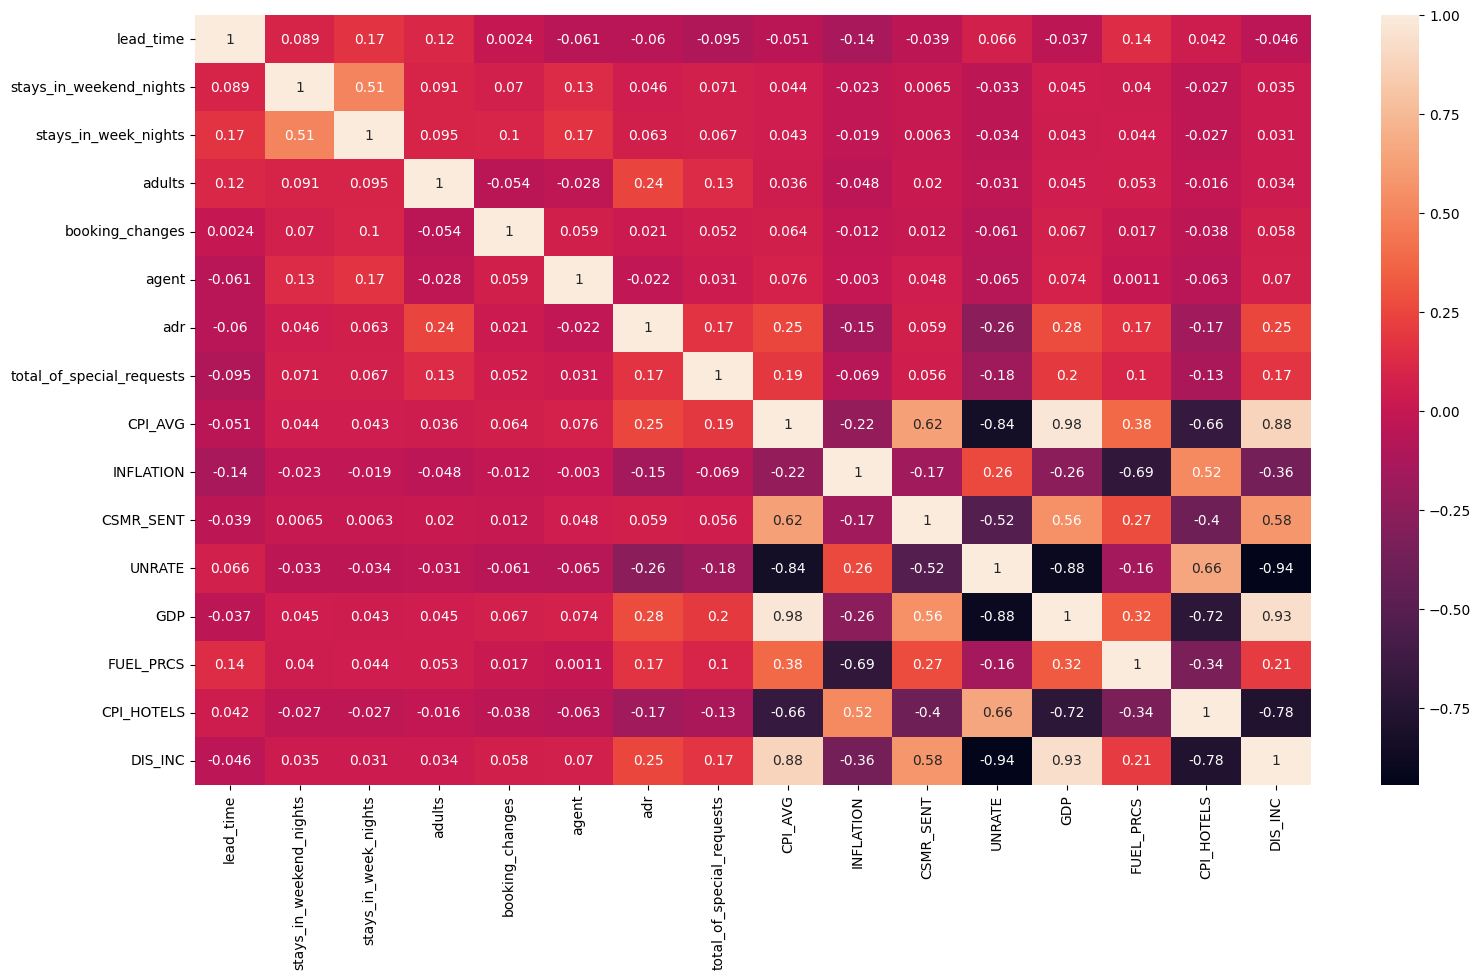

In [62]:
plt.figure(figsize=(18,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

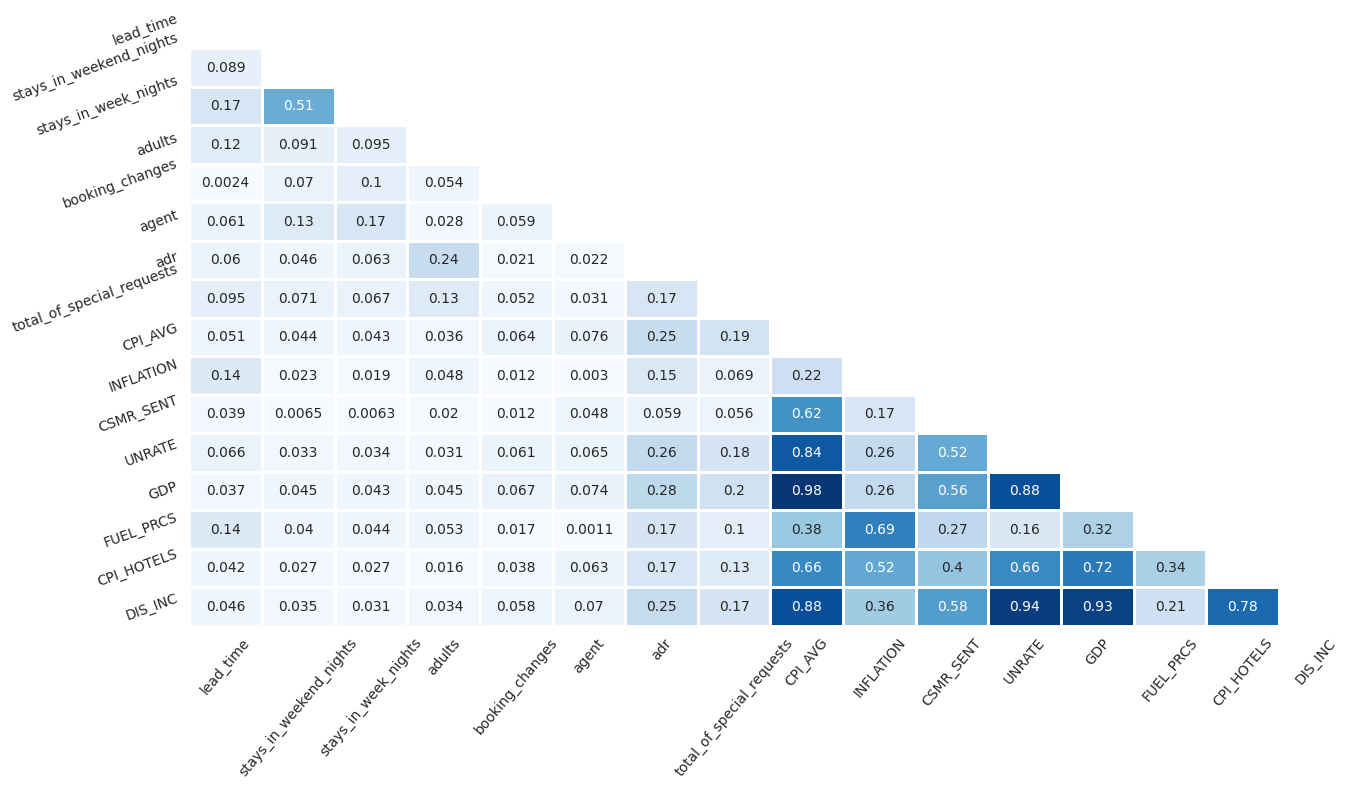

In [63]:
corr = abs(X_train.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Heatmap
plt.xticks(rotation = 50)   # Aesthetics
plt.yticks(rotation = 20)   # Aesthetics
plt.show()

In [64]:
# CPI_AVG has high correlation with UNRATE(-0.84), GDP(0.98), DIS_INC(0.88), hence these variables can be dropped, while keeping CPI_AVG.

X_train.drop(columns=['UNRATE', 'GDP', 'DIS_INC'], inplace = True)
# Drop columns in training data: required_car_parking_spaces, days_in_waiting_list, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, assigned_room_type. Reflect the changes in test.


X_test.drop(columns=['UNRATE', 'GDP', 'DIS_INC'], inplace = True)

In [65]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(83446, 42) (35763, 42)


### Base Model

In [66]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DT",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("dt", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)


In [67]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

In [96]:
# Loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "precision"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    t0 = time.time()
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    print("Training time", time.time()-t0)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))
    print("\n")

Training time 6.022535800933838
LR: 84.07522550933406


Training time 4.819279670715332
DT: 78.4087708251573


Training time 77.94727802276611
RF: 90.55698486477766


Training time 22.031983375549316
ADB: 84.03574562599975


Training time 8.361807107925415
XGB: 89.47078752970774




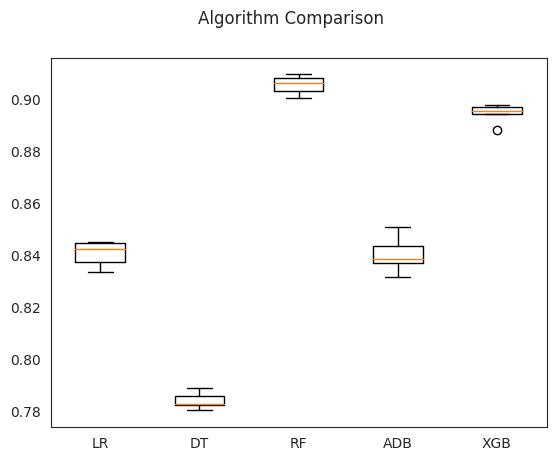

In [69]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [93]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

* We can see that Random Forest Algorithm is giving the best precision score followed by XGBoost Algorithm.
* Random Forest performance is consistent, XGBoost performance is mostly consistent with just one outlier.
* We will tune best two models i.e. decision tree and xgboost and see if the performance improves

Random Forest

In [76]:

param_grid = {
    'n_estimators': [10,25, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Building a **Random Forest Model** with hyperparameter tuning using **RandomizedSearch CV**

In [78]:
%%time
# Search for best paramters in the range for RandomForestClassifier

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)
CPU times: user 2min 15s, sys: 203 ms, total: 2min 15s
Wall time: 2min 19s


In [82]:
%%time
rf_model = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,n_estimators=25) # Model with best parameters chosen
rf_model.fit(X_train, y_train) #training of model

CPU times: user 8.92 s, sys: 27.4 ms, total: 8.94 s
Wall time: 14.5 s


RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

In [84]:
# predict the mode
y_predict = rf_model.predict(X_test)

print("Training accuracy",rf_model.score(X_train,y_train))  #  training accuracy for data in xtrain
print()
print("Testing accuracy",rf_model.score(X_test, y_test))   # testing accuracy for data in xtest

Training accuracy 0.7994511420559404

Testing accuracy 0.8000167771160137


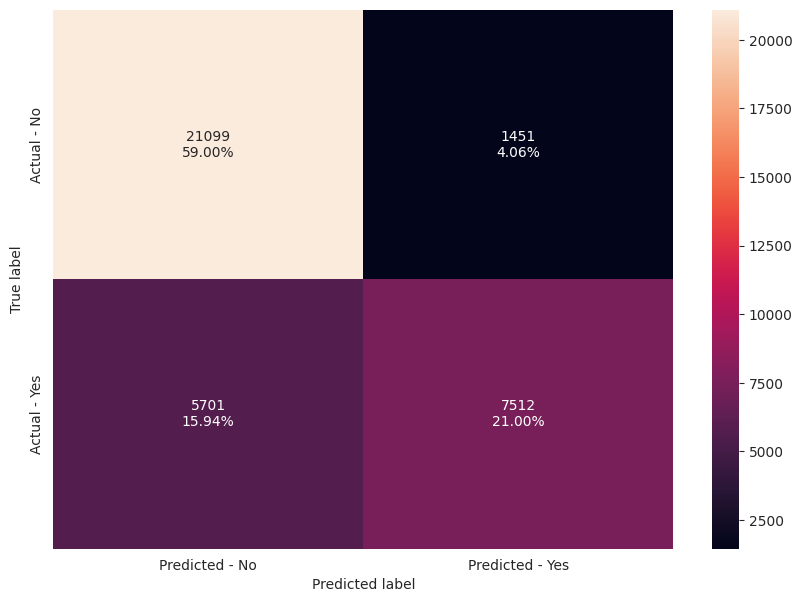

In [86]:
#Plot confusion matrix for  Random Forest Algorithm

draw_cm(y_test,y_predict)

In [87]:
# Precision

precision_score(y_test,y_predict)

0.8381122392056232

Building a **XGBoost Model** with hyperparameter tuning using **RandomizedSearch CV**

In [88]:
param_grid = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [90]:
%%time
# Search for best paramters in the range for RandomForestClassifier
xgb_search = RandomizedSearchCV(XGBClassifier(),
                                   param_grid)
xgb_search.fit(X_train, y_train)
print(xgb_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
CPU times: user 2min 19s, sys: 527 ms, total: 2min 20s
Wall time: 1min 25s


In [91]:
%%time

xgb_model = XGBClassifier(max_depth=9, min_child_weight=5) # Model with best parameters chosen
xgb_model.fit(X_train, y_train) # Training the model

CPU times: user 6.12 s, sys: 14.9 ms, total: 6.14 s
Wall time: 4.85 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
# predict the mode
y_predict = xgb_model.predict(X_test)

print("Training accuracy",xgb_model.score(X_train,y_train))  #  training accuracy for data in xtrain
print()
print("Testing accuracy",xgb_model.score(X_test, y_test))   # testing accuracy for data in xtest

Training accuracy 0.9210267718045203

Testing accuracy 0.8847971367055336


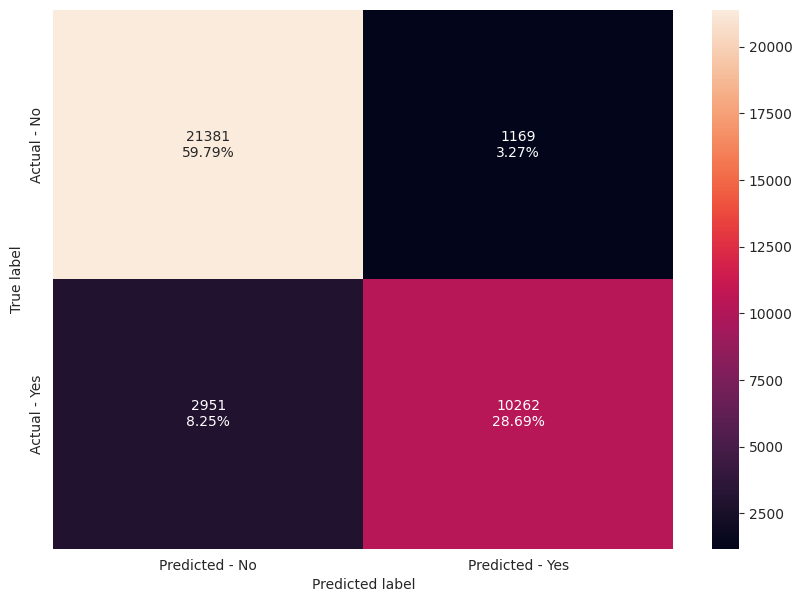

In [98]:
# Plot confusion matrix for XGBoost Algorithm-

draw_cm(y_test,y_predict)

In [99]:
# Precision

precision_score(y_test,y_predict)

0.8977342314758114